# FRA 503: Deep Reinforcement Learning Final Project

## 65340500062 Aitthikit Kitcharoennon

## Stabilize Double inverted pendulum on cart (Reinforcement learning)

### Project overview

ในปัจจุบันการทำระบบควบคุมเริ่มมีการนำ Reinforcement Learning มาใช้งานมากขึ้นเพราะเป็นระบบควบคุมแบบไม่มีโมเดล(free model)และสามารถสร้างได้จากการเรียนรู้ของหุ่นยนต์เลย ผู้จัดทำจึงมีความสนใจที่จะศึกษา Reinforcement Learning ผ่านการทำระบบควบคุมสมดุลของ DIPC (Double inverted pendulum) โดยโปรเจคนี้จะเน้นไปที่การศึกษา Algorithm ของ RL เช่น PPO และ SAC เพื่อเปรียบเทียบการเรียนรู้ของ Algorithm ในปัญหาของการรักษาสมดุล DIPC

## Objective

-   Understand how SAC algorithm work.

-   Compared 2 algorithms (SAC vs PPO) to find pros and cons of each algorithm while training.

-   Compared 2 algorithms to find which one perform good at control task.

-   Analyze and conclusion result


## Scope

- Double Inverted pendulum จะศึกษาใน 1 ท่าทางเท่านั้น คือ ท่าทางตั้งขึ้น และทำการ Stabilize

- Double Inverted pendulum จะไม่มีสิ่งรบกวนในระบบระหว่างการศึกษาพฤติกรรมการควบคุมของทั้งสอง Algorithm

- Algorithm ที่ใช้งานจะนำมาจาก Library stable baseline3 ทั้งสอง algorithm

- ทั้งสอง algorithm จะใช้งาน Hyperparameter ที่ถูกปรับมาแล้วซึ่งเป็น Baseline

- ในการ Train จะทำการ Train เพียงทีละ 1 alghorithm และ 1 config เท่านั้น(ไม่ทำการ train หลาย config พร้อมกันเพื่อเป็นการวัดผลทาง wall clock time)

## Problem formulation

ในการนำระบบควบคุมแบบ model-free ไปใช้งานในโลกของความเป็นจริงนั้นยังคงเป็นไปได้ยากสำหรับ Reinforcement learning ไม่ว่าจะเป็น learning model ประเภท On-policy หรือ Off-policy ก็ตาม

- On-policy 

    - ต้องการให้มีการเก็บ sample ใหม่เพื่อใช้ในการอัปเดต gradient step ซึ่งส่งผลให้ในการฝึกแต่ละครั้งนั้นจำเป็นที่จะต้องใช้งานจำนวน sample จำนวนมากตามจำนวนของ gradient step ซึ่งถ้างานมึความซับซ้อนมากขึ้นก็จะยิ่่งส่งผลให้ต้องใช้งานจำนวน sample มากขึ้นเช่นเดียวกัน

    - ตัวอย่าง algorithm เช่น TRPO, PPO, A3C และอื่น ๆ

- Off-policy

    - มีเป้าหมายเพื่อใช้ประสบการณ์ที่ผ่านมาให้เกิดประโยชน์ซ้ำ ซึ่งไม่สามารถทำได้โดยตรงกับ conventional policy gradient แต่สามารถทำได้ค่อนข้างตรงไปตรงมาโดยการใช้ Q-learning แต่ในการผสมผสานระหว่างการเรียนรู้แบบ Off-policy กับการประมาณฟังก์ชันที่ไม่เชิงเส้นและมีมิติสูงโดยใช้ Neural Network ส่งผลให้การลู่เข้าและความเสถียรภาพนั้นเกิดขึ้นค่อนข้างยาก ซึ่งถ้าอยู่ในสภาวะที่มี state และ action เป็นแบบ Continuous ส่งผลให้การลู่เข้าและความเสถียรภาพนั้นเกิดขึ้นยากมากขึ้นไปอีก 

    - ตัวอย่าง algorithm เช่น DDPG

## Part 1: Advanced techniques (Understanding how SAC Algorithm work).

ในส่วนนี้จะเป็นการอธิบายถึงหลักการทำงานของ Algorithm Soft Actor-Critic และขั้นตอนในการอัปเดต algorithm

### Soft Actor-Critic (Actor-Critic algorithm)

เป็น Algorithm ประเภท Actor-Critic ที่มีการออกแบบมาเพื่องานที่เป็น Continuous action spaces เช่นการควบคุมหุ่นยนต์ โดยสิ่งที่เป็นแนวคิดหลักของ Algorithm นี้คือการเปลี่ยน Objective ของ RL ที่จะสนใจแค่การทำให้ได้ reward สูงที่สุดโดยการเพิ่มในส่วนของ Entropy (ϰ) เข้ามาใน 

Objective function ซึ่งจะช่วยในการสุ่ม Action ให้เยอะที่สุด เพื่อ Explore ได้ดีมากยิ่งขี้น โดยใน SAC จะประกอบไปด้วย Policy network (Actor) 1 ตัว Q-network (Critic) 2 ตัว และ Entropy Temperature ที่ใช้ในการปรับสมดุลระหว่าง Explore กับ Exploit

$$
J(\pi) = \mathbb{E}_{(s_t, a_t) \sim \rho_\pi} \left[ \sum_{t=0}^{\infty} \gamma^t \left( r(s_t, a_t) + \alpha \mathcal{H}(\pi(\cdot|s_t)) \right) \right]
$$

โดยที่ :

- $\mathcal{H}(\pi(\cdot|s)) = - \mathbb{E}_{a \sim \pi(\cdot|s)}[\log \pi(a|s)]$ is the entropy of the policy.

- $\pi(a|s)$ is the stochastic policy.

- $\alpha$ is the temperature parameter (balances reward and entropy).

- $p_\pi$  is the state-action distribution induced by the policy.

Policy loss :

$$
J_\pi(\phi) = \mathbb{E}_{s \sim D} [\mathbb{E}_{a \sim \pi_\phi}(alog\pi_\phi(a|s)-\min_{i=1,2}Q_{\theta_i}(s,a))]
$$

Q-network loss :

$$
J_Q(\theta) = \mathbb{E} \left[  (Q(s,a)- \left(r + \gamma (\min_{i}Q_{\theta'_i}(s', a') - alog\pi(a'|s'))\right))^2 \right]
$$

Step to update in SAC :

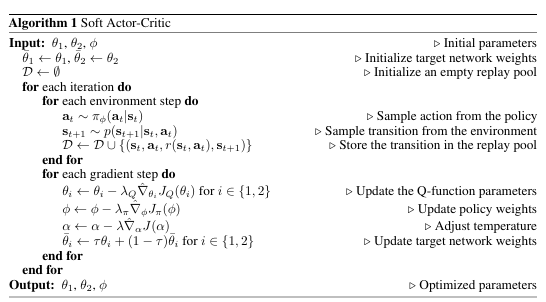

Ref:https://arxiv.org/pdf/1801.01290 & https://arxiv.org/pdf/1812.05905

Diagram for step to update

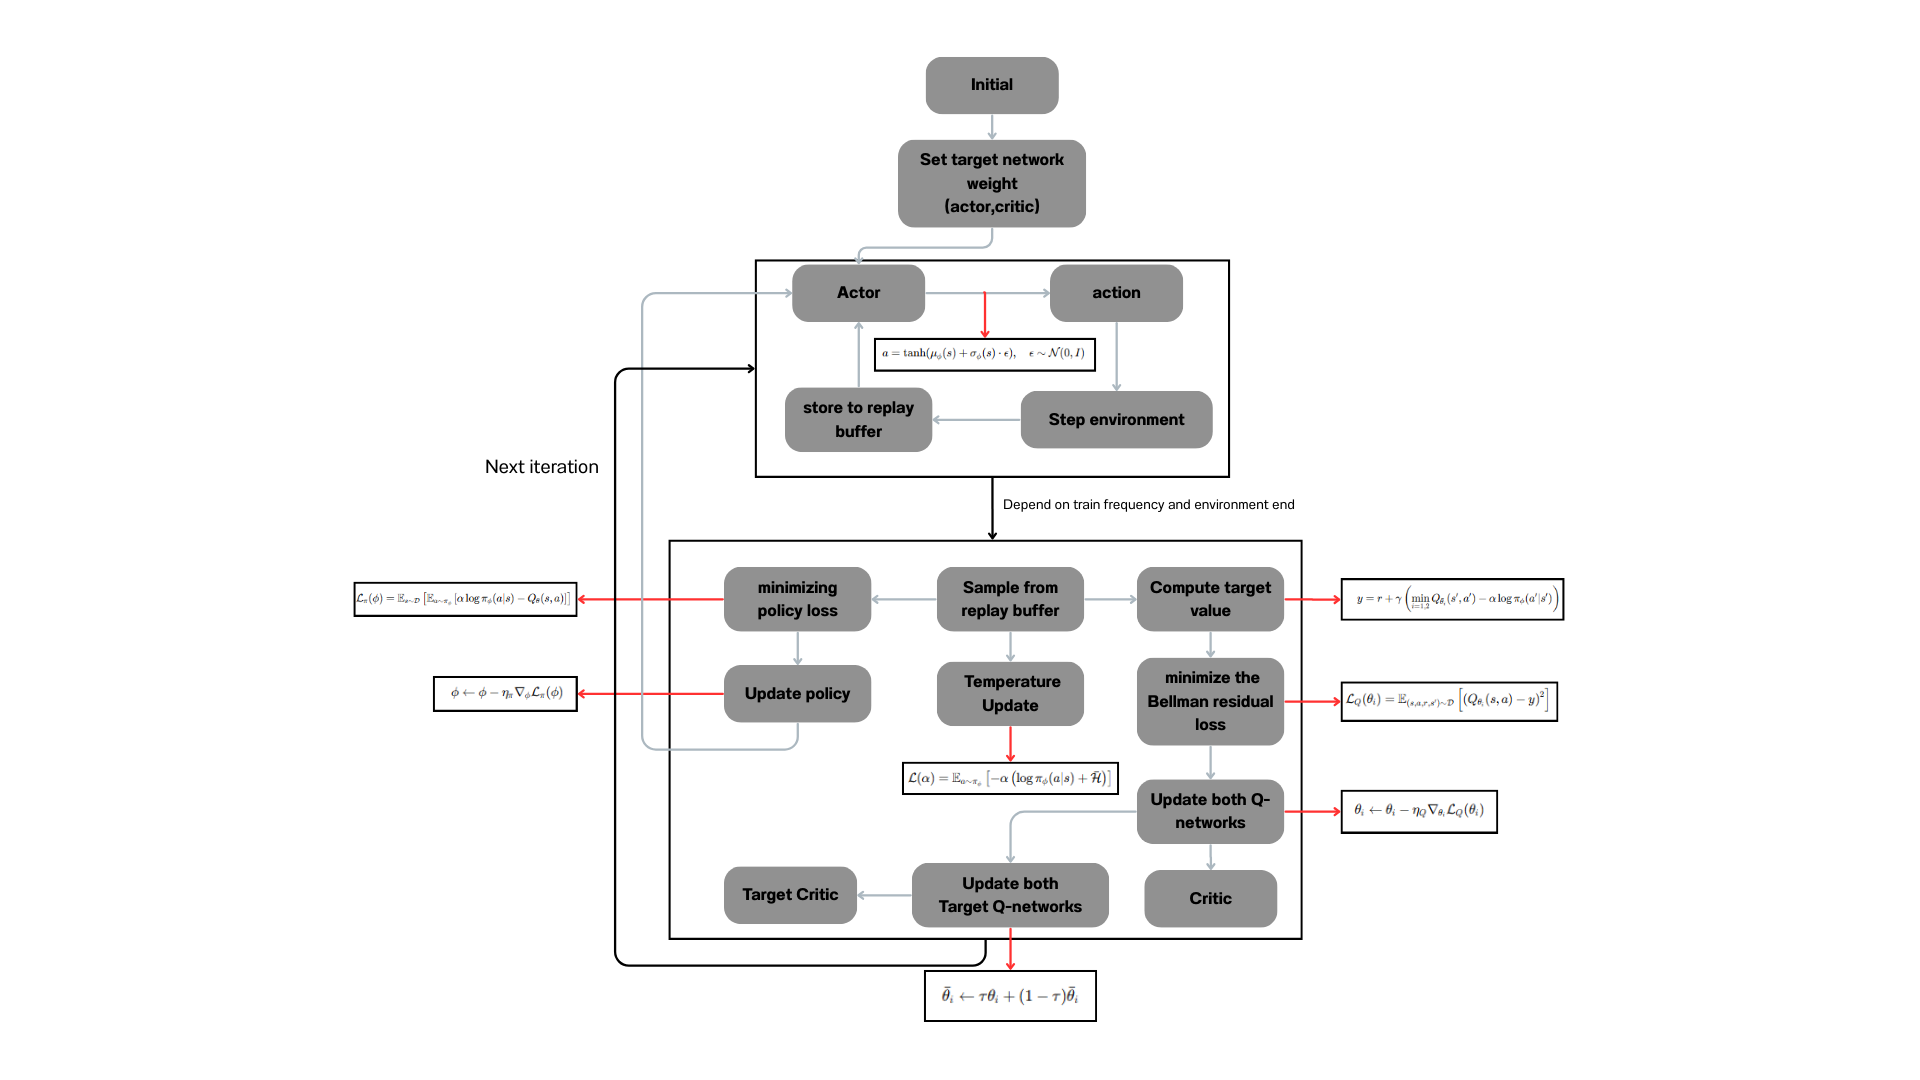

Maximize Entropy คือการพยายามทำให้การเลือกแจกแจงความน่าจะเป็นที่ "กระจายตัวมากที่สุด" หรือ "ไม่ลำเอียง" ภายใต้ข้อจำกัดบางอย่าง ซึ่งในการทำการ maximize entropy นั้นจะทำให้ agents สามารถเลือก Actions ที่ไม่ซ้ำกันส่งผลให้สามารถ exploration ได้มากยิ่งขึ้น

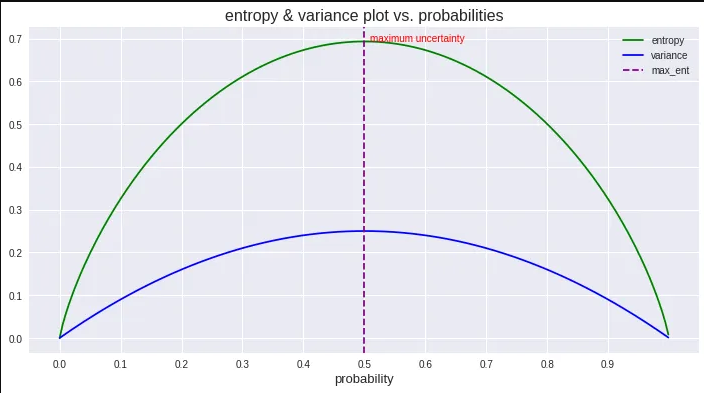

Ref : https://medium.com/intuition/the-principle-of-maximum-entropy-ec5fa2f84a0c

## Part 2: Setting up Environment and Agents.

### Environment Setup

#### Create base frame

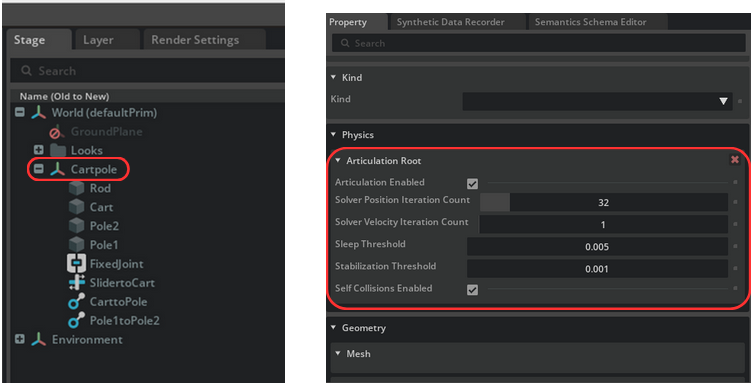

Define the Articulation Root

- For a top-level link

- Used to calculate forward/inverse kinematics, apply root forces/torques, and simulate joint constraints.

- Setup solver that use for calculate kinematic and dynamic of environment

#### Create mesh body and joint

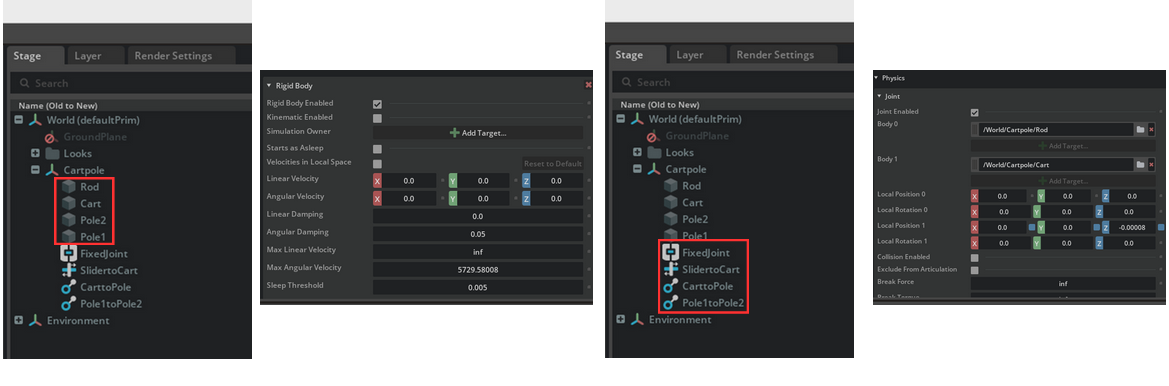

From Left to Right picture

- Create the mesh and shape (Rod Cart Pole1 and Pole2)

- Add the Body to each mesh and shape and set the parameter for mass and inertia

- Create joint

    - Fixedjoint : Fixed Rod to Articulation Root

    - SlidertoCart : Prismatic joint for move Cart on Rod

    - Carttopole : Revolute joint for move Pole1 on Cart
    
    - Pole1toPole2 : Revolute joint for move Pole1 on Pole2

#### Test the environment

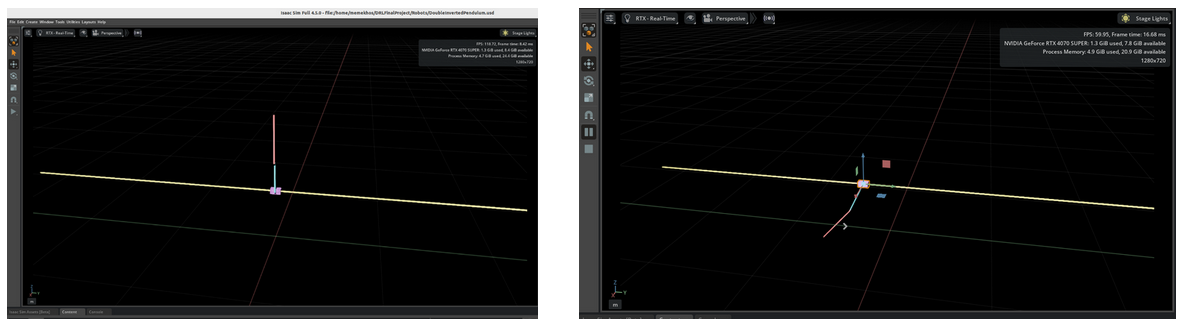

After use simulation function of isaac Sim found the environment are working well

#### Config the Environment

Reset config

In [ ]:
@configclass
class EventCfg:
    """Configuration for events."""

    # reset
    reset_cart_position = EventTerm(
        func=mdp.reset_joints_by_offset_fix,
        mode="reset",
        params={
            "asset_cfg": SceneEntityCfg("robot", joint_names=["SlidertoCart"]),
            "position_range": (-1.0, 1.0),
            "velocity_range": (-0.5, 0.5),
        },
    )

    reset_pole_position = EventTerm(
        func=mdp.reset_joints_by_offset_fix,
        mode="reset",
        params={
            "asset_cfg": SceneEntityCfg("robot", joint_names=["CarttoPole"]),
            "position_range": (-float(np.deg2rad(24.0)), float(np.deg2rad(24.0))),
            "velocity_range": (-float(np.deg2rad(24.0)), float(np.deg2rad(24.0))),
        },
    )


    reset_pole_double_position = EventTerm(
        func=mdp.reset_joints_by_offset_fix,
        mode="reset",
        params={
            "asset_cfg": SceneEntityCfg("robot", joint_names=["Pole1toPole2"]),
            "position_range": (-float(np.deg2rad(24.0)), float(np.deg2rad(24.0))),
            "velocity_range": (-float(np.deg2rad(24.0)), float(np.deg2rad(24.0))),
        },
    )

Reward config

In [ ]:
@configclass
class RewardsCfg:
    """Reward terms for the MDP."""

    # (1) Constant running reward
    alive = RewTerm(func=mdp.is_alive, weight=10.0)
    # (2) Failure penalty
    terminating = RewTerm(func=mdp.is_terminated, weight=-20.0)
    # (3) Joint_pos
    cart_pos = RewTerm(func=mdp.joint_pos_target_l2,weight = -5.0 ,params={"asset_cfg": SceneEntityCfg("robot",joint_names = ["SlidertoCart"]),"target" : 0.0})

    joint_pos = RewTerm(func=mdp.joint_pos_target_l2,weight = -10.0 ,params={"asset_cfg": SceneEntityCfg("robot",joint_names = ["CarttoPole"]),"target" : 0.0})

    joint_pos2 = RewTerm(func=mdp.joint_pos_target_l2,weight = -10.0 ,params={"asset_cfg": SceneEntityCfg("robot",joint_names = ["Pole1toPole2"]),"target" : 0.0})
    # (4) Shaping tasks: lower cart velocity

    cart_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.8,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["SlidertoCart"])},
    )
    # (5) Shaping tasks: lower pole angular velocity
    pole_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.05,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["CarttoPole"])},
    )

    pole_vel2 = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.05,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["Pole1toPole2"])},
    )

Terminations Config

In [ ]:
@configclass
class TerminationsCfg:
    """Termination terms for the MDP."""

    # (1) Time out
    time_out = DoneTerm(func=mdp.time_out, time_out=True)
    # (2) Cart out of bounds
    cart_out_of_bounds = DoneTerm(
        func=mdp.joint_pos_out_of_manual_limit,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["SlidertoCart"]), "bounds": (-2.5, 2.5)},
    )
    # (3) Pole out of bounds
    pole_out_of_bounds = DoneTerm(
        func=mdp.joint_pos_out_of_manual_limit,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["CarttoPole"]), "bounds": (float(np.deg2rad(-45.0)), float(np.deg2rad(45.0)))},
    )

    pole2_out_of_bounds = DoneTerm(
        func=mdp.joint_pos_out_of_manual_limit,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["Pole1toPole2"]), "bounds": (float(np.deg2rad(-24.0)), float(np.deg2rad(24.0)))},
    )

### Agents Setup

ในการ Train จะใช้งาน Algorithm ที่มาจาก library stable baseline3(sb3) โดยในแต่ละ Agent จะมีการถูกตั้ง Hyperparameter เอาไว้ดังนี้

#### Proximal Policy Optimization (PPO) agent

In [ ]:
seed: 42
n_timesteps: !!float 1e7
policy: 'MlpPolicy'
n_steps: 16
batch_size: 4096
gae_lambda: 0.95
gamma: 0.99
n_epochs: 20
ent_coef: 0.01
learning_rate: !!float 3e-4
clip_range: !!float 0.2
policy_kwargs: "dict(
                  activation_fn=nn.ELU,
                  net_arch=[32, 32],
                  squash_output=False,
                )"
vf_coef: 1.0
max_grad_norm: 1.0
device: "cuda:0"

#### Soft Actor-Critic (SAC) agent

In [ ]:
  seed: 42
  n_timesteps: !!float 10e6
  policy: 'MlpPolicy'
  learning_rate: !!float 3.0e-4
  buffer_size: 1000000
  batch_size: 256
  ent_coef: 'auto'
  gamma: 0.99
  tau: 0.005
  train_freq: 1
  gradient_steps: 1
  learning_starts: 10000
  use_sde: False
  policy_kwargs: "dict(log_std_init=-3, net_arch=[256, 256])"
  device: "cuda:0"

## Part 3: Compared algorithm

ในส่วนของการทดสอบและเปลี่ยบเทียบจะถูกแบ่งออกเป็นทั้งหมด 4 หัวข้อดังนี้

- Training Type

- Wall clock time training

- Reward Scaling

- Stability to control

ซึ่งได้อ้างอิงมาจากการทดสอบ Algorithm SAC ของ https://arxiv.org/pdf/1801.01290

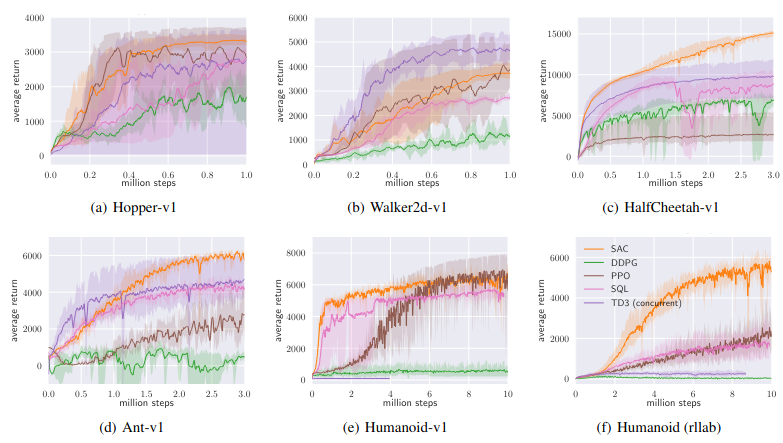

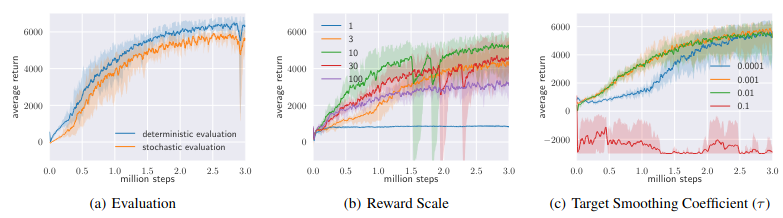

### Training Type

สมมุติฐาน
- On-policy algorithm นั้นเรียนจาก state และ actions ที่ถูกกระทำโดย policy ปัจจุบันส่งผลให้ Algorithm นี่้น่าจะสามารถ Train ได้ดีในการ training แบบ parallel 

ตัวแปรต้น

| **จำนวน environment** |
|---------------------------|
| 1 (200k steps)            |
| 4 (500k steps)            |
| 256 (5m steps)            |
| 1024 (10m steps)          |

ตัวแปรตาม

- การลู่เข้าของ Reward และ จำนวน step ในการลู่เข้า

ตัวแปรควบคุม

- Reward scale, Environment, number steps to trains


#### Single Training

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/single.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Alive steps per Episode</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/single_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Reward per Episode</p>
    </div>
</div>

#### Parallel 4 Environments

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/Parallel4.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Alive steps per Episode</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/Parallel4_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Reward per Episode</p>
    </div>
</div>

#### Parallel 256 Environments

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/parallel256.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Alive steps per Episode</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/parallel256_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Reward per Episode</p>
    </div>
</div>

#### Parallel 1024 Environments

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/parallel1024.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Alive steps per Episode</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/parallel1024_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>Average Reward per Episode</p>
    </div>
</div>

 จากการทดลองพบว่าในการ Train algorithm SAC ซึ่งเป็น Algorithm ประเภท Off-policy นั้นการ Train ในรูปแบบ Parallel Training นั้นไม่เหมาะสำหรับ algorithm นี้เนื่องจากการที่เป็น Off-policy ทำให้จะทำการเรียนจาก history แต่ถ้ามีการ Train Parallel มากเกินไปจะส่งผลให้ใน history ของ Replay buffer นั้นถู๔กแทนที่ด้วย ค่าจาก Policy ใหม่ซึ่งจะส่งผลให้ Agent นั้นไม่ค่อยเรียนรู้หรนือเรียนรู้ช้า แต่ในการทดลอง Train algorithm PPO ซึ่งเป็นแบบ On-policy นั้นส่งผลตรงกันข้ามกับ SAC เพราะ PPO ตัองการข้อมูลจาก Policy ปัจจุบันเพื่อนำไปอัปเดตส่่งผลให้ในการ Train รูปแบบ Parallel จะทำให้ PPO เรียนรู้ได้ไวมากยิ่งขึ้น

### Wall clock time training

สมมุติฐาน
- Algorithm ที่สามารถ Train แบบ parallel จะใช้เวลาในการ Train ที่น้อยกว่า 

ตัวแปรต้น

- Algorithm ที่มีผลลัพธ์ในการ Train ที่ดีที่สุด
    - SAC train with 4 environment
    - PPO train with 1024 environment 

ตัวแปรตาม

- เวลาในโลกความเป็นจริง

ตัวแปรควบคุม

- Reward scale, Environment


<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/BestPPOcon.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>PPO 1024 environments</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/BestSAccon.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>SAC 4 environments</p>
    </div>
</div>

In best performance training environment

- PPO 1024 environments
    - ใช้เวาลในการลู่เข้าของ Reward ประมาณ 2.407 นาที
    - จาก Episode lenght พบว่ายังไม่สามารถ Stabilize ได้ในทุก Case
    - มีการเริ่มลู่เข้าที่เร็วมากกว่า SAC

- SAC 4 environment

    - ใช้เวาลในการลู่เข้าของ Reward ประมาณ 6.547 นาที
    - จาก Episode lenght พบว่าสามารถ Stabilize ได้ในทุก Case แล้ว
    - การเรียนรู้ค้่อนข้างราบรื่นมากกว่า PPO

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/BestPPOclock.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>PPO 1024 environments</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/BestSAccon.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>SAC 4 environments</p>
    </div>
</div>

In best performance training environment and same wall clock time

- PPO 1024 environments
    - จบการ Train ก่อนที่จะถึงเวลา 6.547 จึงพิจารณาที่ Step สุดท้าย
    - จาก Episode lenght พบว่ายังไม่สามารถ Stabilize ได้ในทุก Case
    - มี Reward ที่สูงกว่าตอนเริ่มลู่เข้าเล็กน้อย

- SAC 4 environment

    - ใช้เวาลในการลู่เข้าของ Reward ประมาณ 6.547 นาที
    - จาก Episode lenght พบว่าสามารถ Stabilize ได้ในทุก Case แล้ว
    - แทบจะไม่มีการเปลี่ยนแปลงในส่วนของการเรียนรู้

### Reward Scaling

สมมุติฐาน
- การที่ Reward Scaling เปลี่ยนไปจะส่งผลต่อการเรียนรู้ของแต่ลชะ algorithm

ตัวแปรต้น

| **Reward Scaling** |
|---------------------------|
| 1            |
|  10          |
|    100      |


ตัวแปรตาม

- ความยาวของ Episode (ใช้ดูการลู่เข้าแทน Reward)

ตัวแปรควบคุม

- Environment, Agents


<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="picture/PPORewardScale.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>PPO 1024 environments</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="picture/SACRewardScale.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>SAC 4 environments</p>
    </div>
</div>

จากการ Train ด้วย Reward ที่แตกต่างกันพบว่า
-  การใช้ Reward scaling ที่สูงนั้นส่งผลให้ PPO มีการเรียนรู้ที่ลู่เข้าไวกว่าซึ่งตรงกันข้ามกับ SAC ที่มีการเรียนรู้ที่ลู่เข้าเร็วกว่าในกรณีที่ Reward scaling น้อย

### Stability to control

สมมุติฐาน
- SAC algorithm จะมีประสิทธิ ภาพในการควบคุมที่ดีมากกว่า PPO

ตัวแปรต้น

| **Deflect Direction of DIPC** | **angle (degree)** |
|---------------------------|----|
| same         |5,10,20,30,40 |
|  Opposite         |5,10,15|


ตัวแปรตาม

- Reward, Observation state

ตัวแปรควบคุม

- Environment, Trained Agents, Reward scaling


In [4]:
import numpy as np
import json
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file
file_path = "obs/SB3_SAC_Opposit10/SB3_SAC_Opposit10"
with open(file_path, "r") as f:
    data = json.load(f)

obs_array = data["observations"]
timesteps = np.arange(1, len(obs_array) + 1)

def plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps, num_steps=1000):
    """
    Plots state data (excluding actions) from multiple JSON files.
    Converts pole-related values from radians to degrees.
    If a file has fewer than `num_steps`, plots up to its available length.
    """
    fig_labels = ["Cart", "Pole1", "Pole2"]
    index_pairs = [(0, 3), (1, 4), (2, 5)]  # (position, velocity) for each group
    degree_indices = [1, 2, 4, 5]  # Indices to convert from rad to deg

    all_data = []
    lengths = []
    valid_file_names = []

    # Load and preprocess data
    for i, file_path in enumerate(file_paths):
        with open(file_path, "r") as f:
            data = json.load(f)

        obs_array = np.array(data["observations"])
        steps = min(len(obs_array), num_steps)

        if steps == 0:
            print(f"Skipping {file_path}: no data available.")
            continue

        obs_array = obs_array[:steps]

        # Convert radians to degrees
        obs_array[:, degree_indices] = np.degrees(obs_array[:, degree_indices])
        all_data.append(obs_array)
        lengths.append(steps)
        valid_file_names.append(file_name[i])
        allreward = np.array(data["sum_reward"])
        print(f"File: {file_path}, Total Reward: {allreward}")

    # Stop if no valid files
    if not all_data:
        print("No valid data to plot.")
        return

    # Plot by grouped state indices
    for fig_idx, idx_group in enumerate(index_pairs):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

        for ax, idx in zip(axes, idx_group):
            for file_index, obs_array in enumerate(all_data):
                steps = lengths[file_index]
                ax.plot(timesteps[:steps], obs_array[:, idx],
                        label=f"{valid_file_names[file_index]}", alpha=0.7)

            label_suffix = " (deg)" if idx in degree_indices else ""
            ax.set_title(state_labels[idx])
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(f"Value{label_suffix}")
            ax.legend()
            ax.grid()

        fig.tight_layout()
        fig.suptitle(f"{plot_name} - {fig_labels[fig_idx]}", fontsize=14, y=1.02)
        plt.show()


#### Deflect Direction of DIPC (Same)

File: obs/SB3_SAC_Same5/SB3_SAC_Same5, Total Reward: 9.972152709960938
File: obs/SB3_PPO_Same5/SB3_PPO_Same5, Total Reward: 9.876129150390625


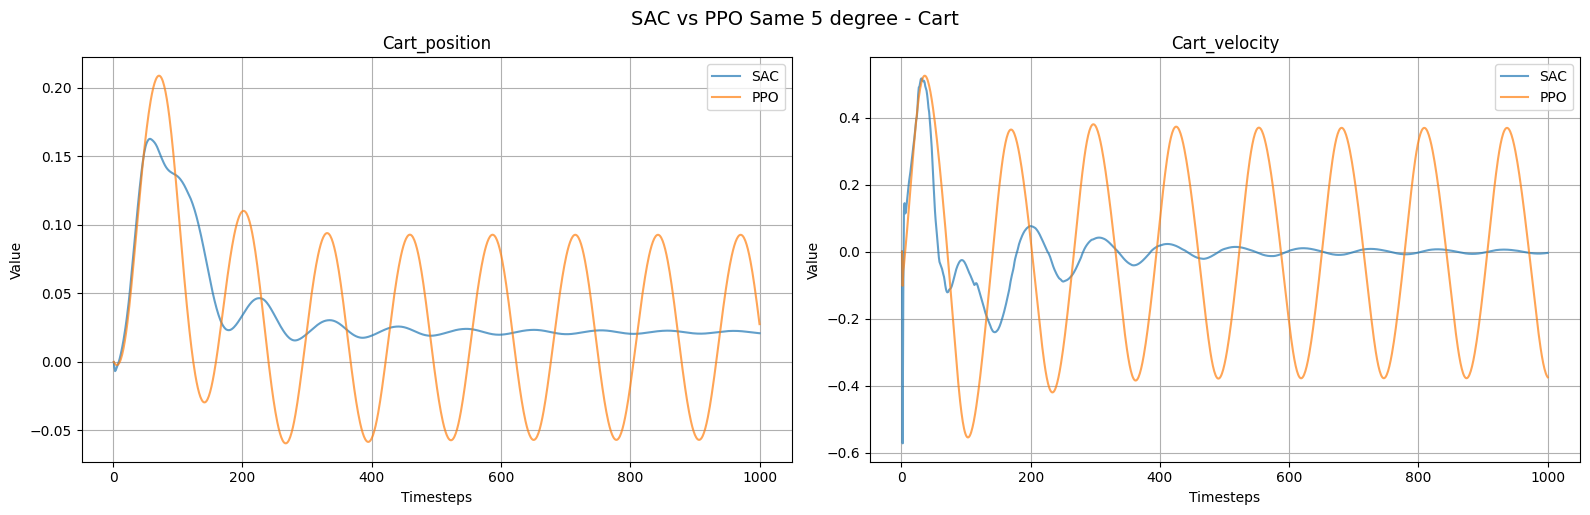

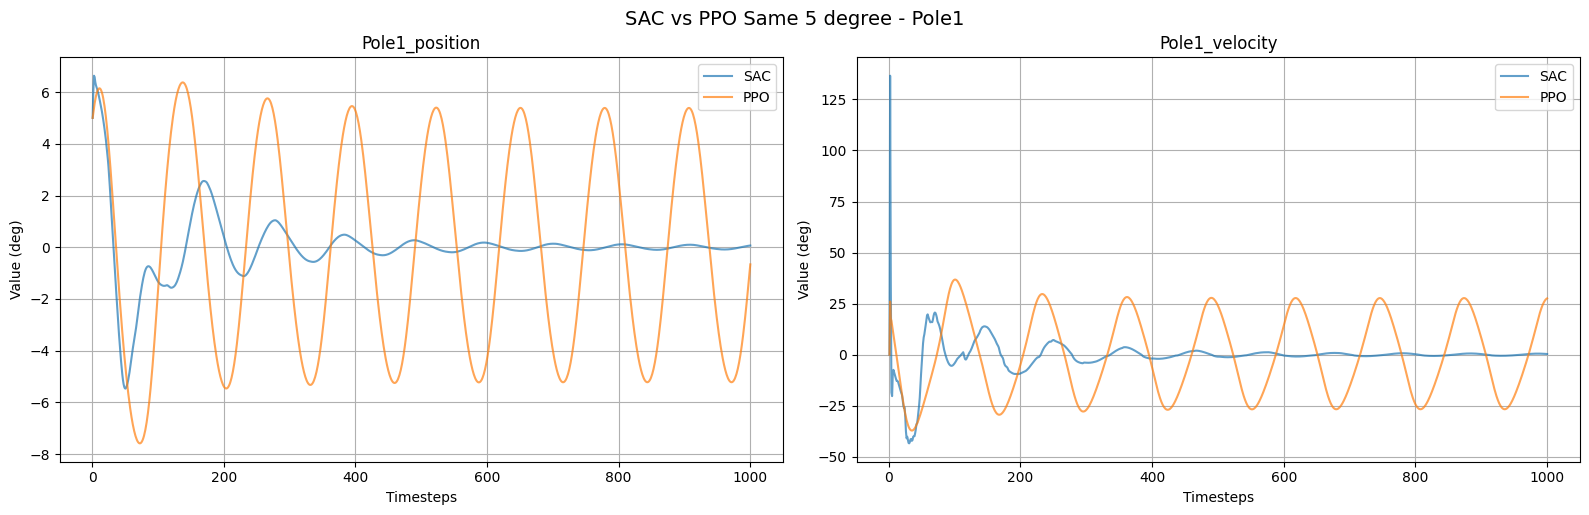

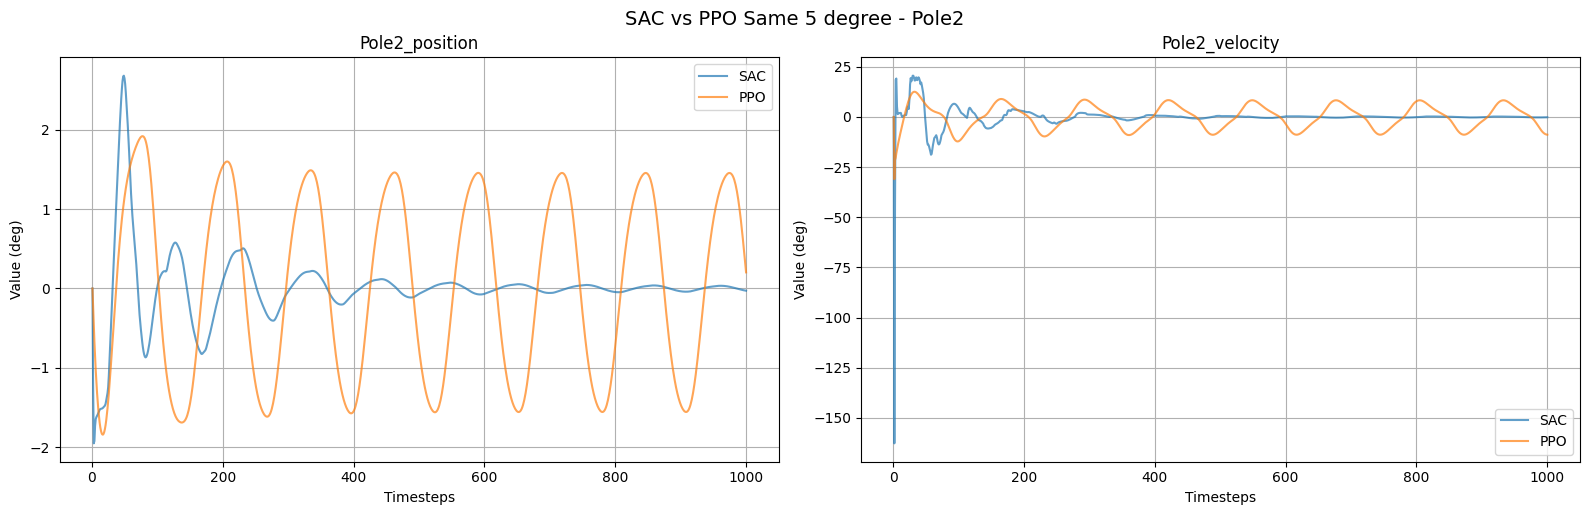

In [6]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same5/SB3_SAC_Same5","obs/SB3_PPO_Same5/SB3_PPO_Same5"]
plot_name = "SAC vs PPO Same 5 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same10/SB3_SAC_Same10, Total Reward: 9.93685245513916
File: obs/SB3_PPO_Same10/SB3_PPO_Same10, Total Reward: 9.815526962280273


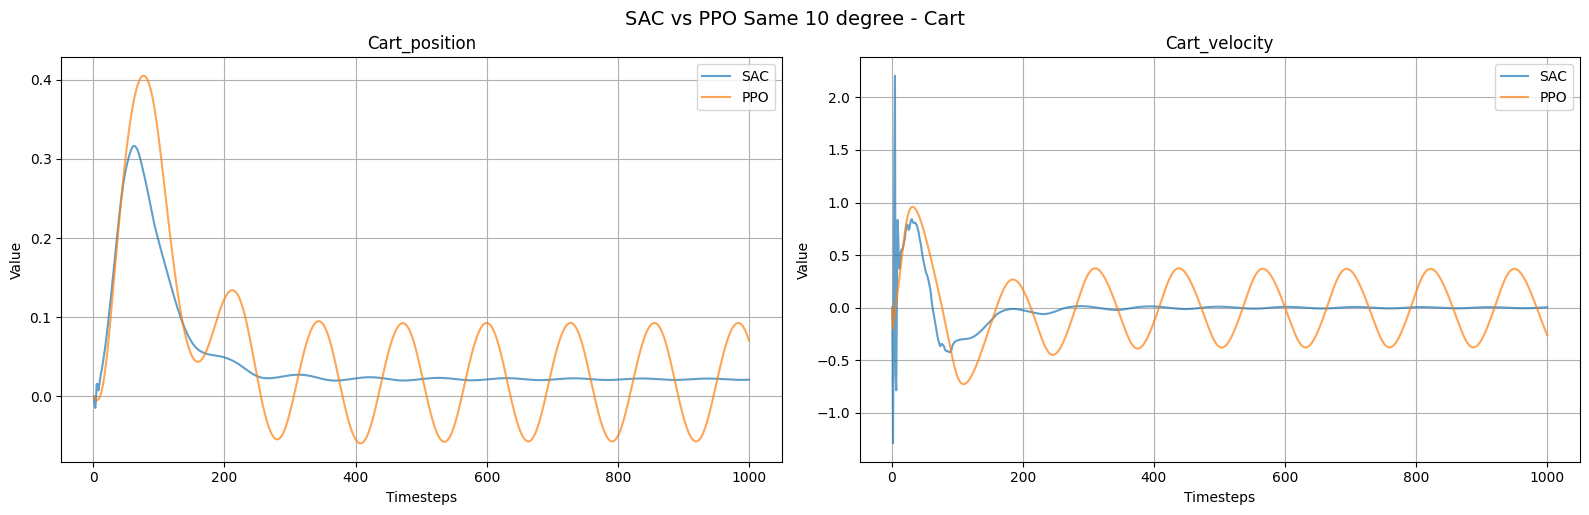

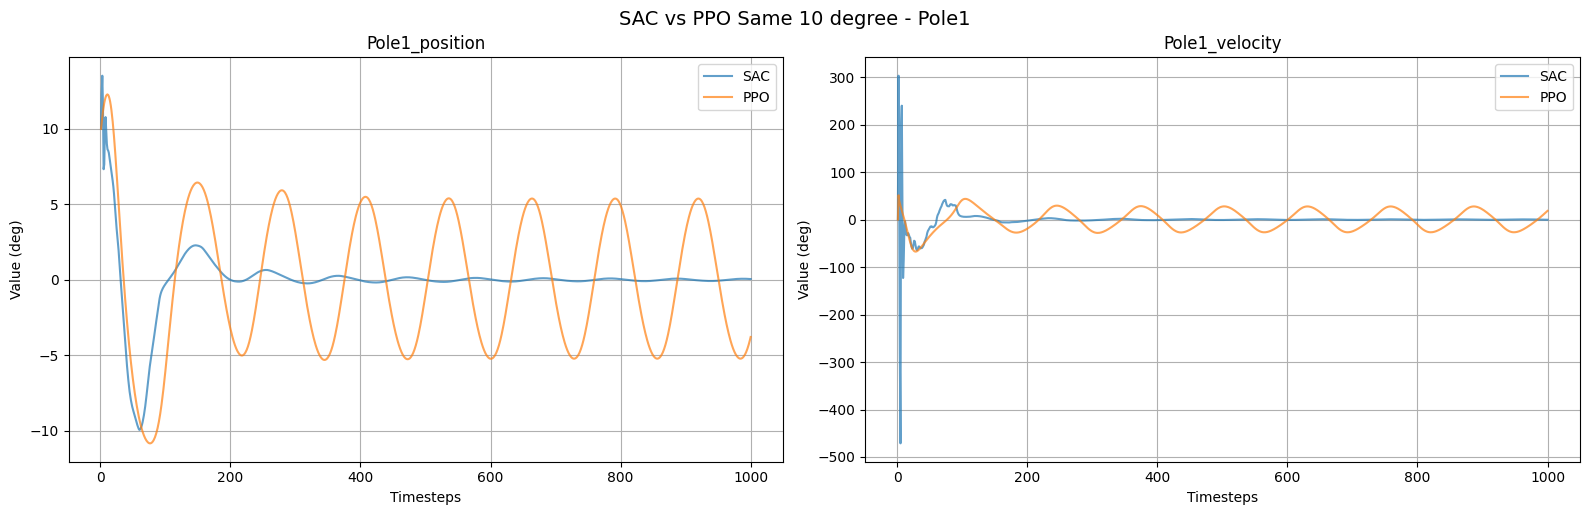

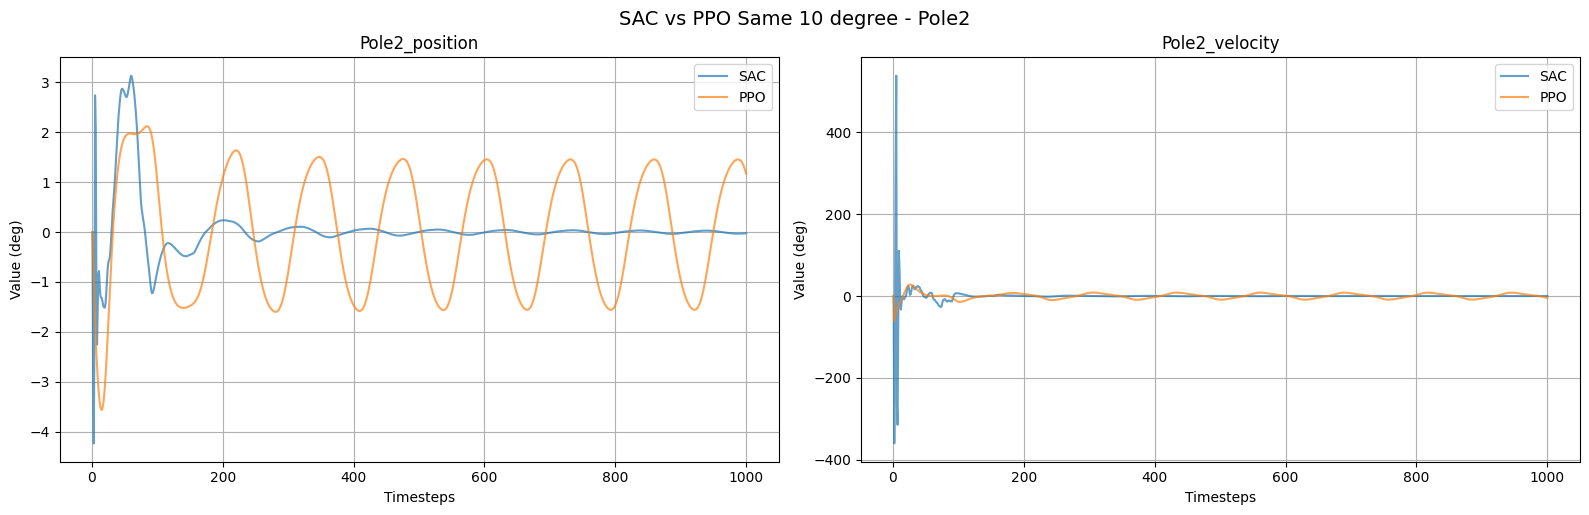

In [7]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same10/SB3_SAC_Same10","obs/SB3_PPO_Same10/SB3_PPO_Same10"]
plot_name = "SAC vs PPO Same 10 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same20/SB3_SAC_Same20, Total Reward: 9.701165199279785
File: obs/SB3_PPO_Same20/SB3_PPO_Same20, Total Reward: 9.532508850097656


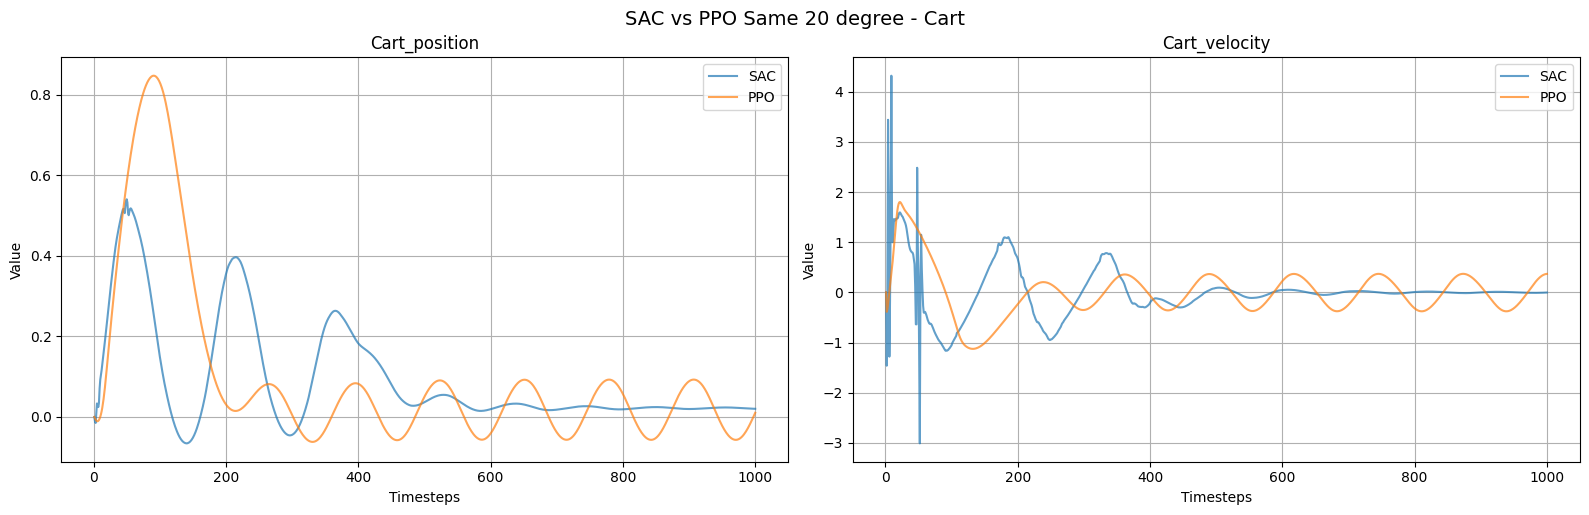

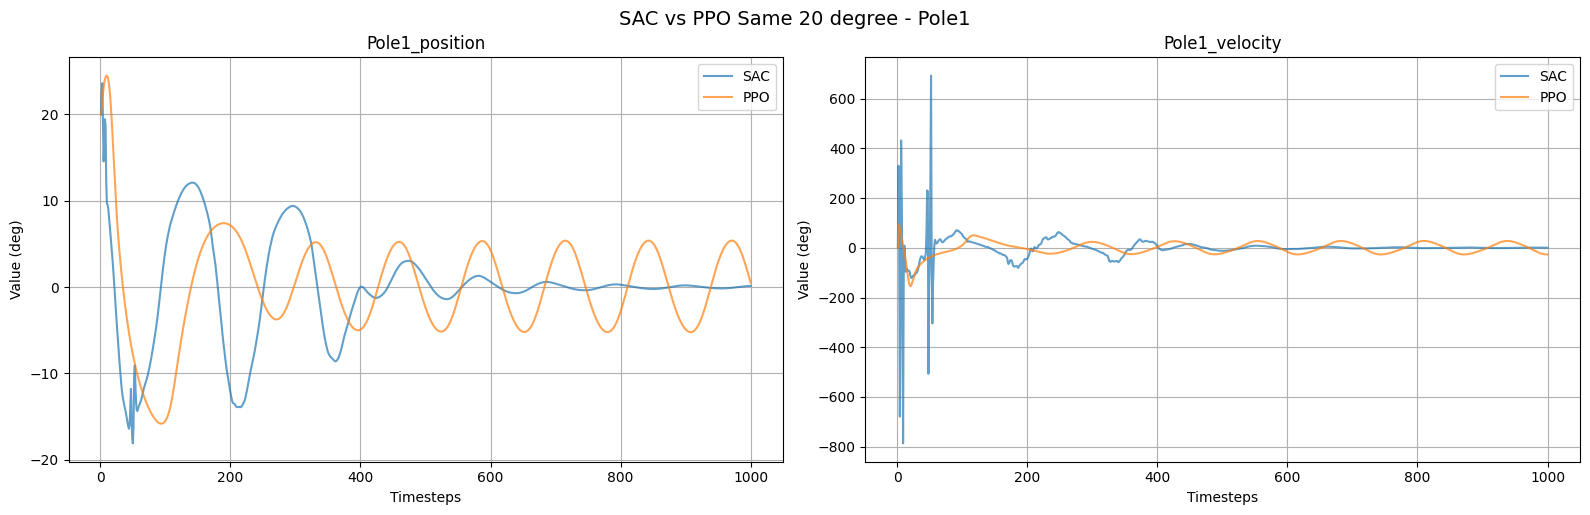

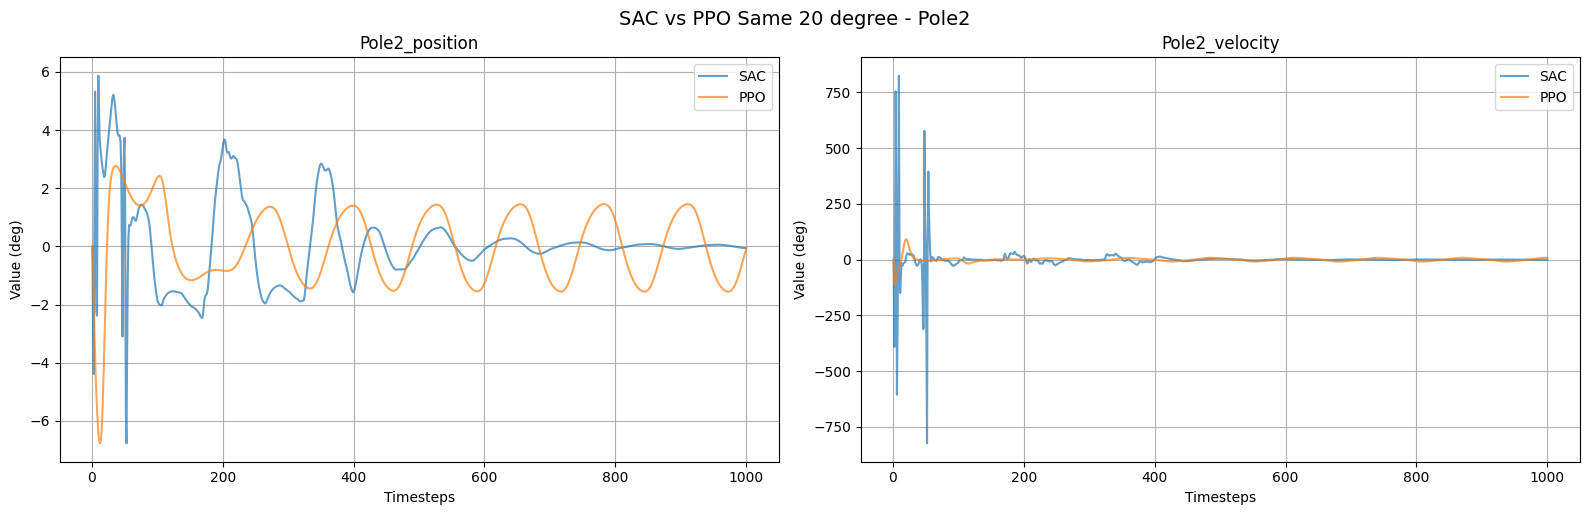

In [8]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same20/SB3_SAC_Same20","obs/SB3_PPO_Same20/SB3_PPO_Same20"]
plot_name = "SAC vs PPO Same 20 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same30/SB3_SAC_Same30, Total Reward: 9.457481384277344
File: obs/SB3_PPO_Same30/SB3_PPO_Same30, Total Reward: 9.278450965881348


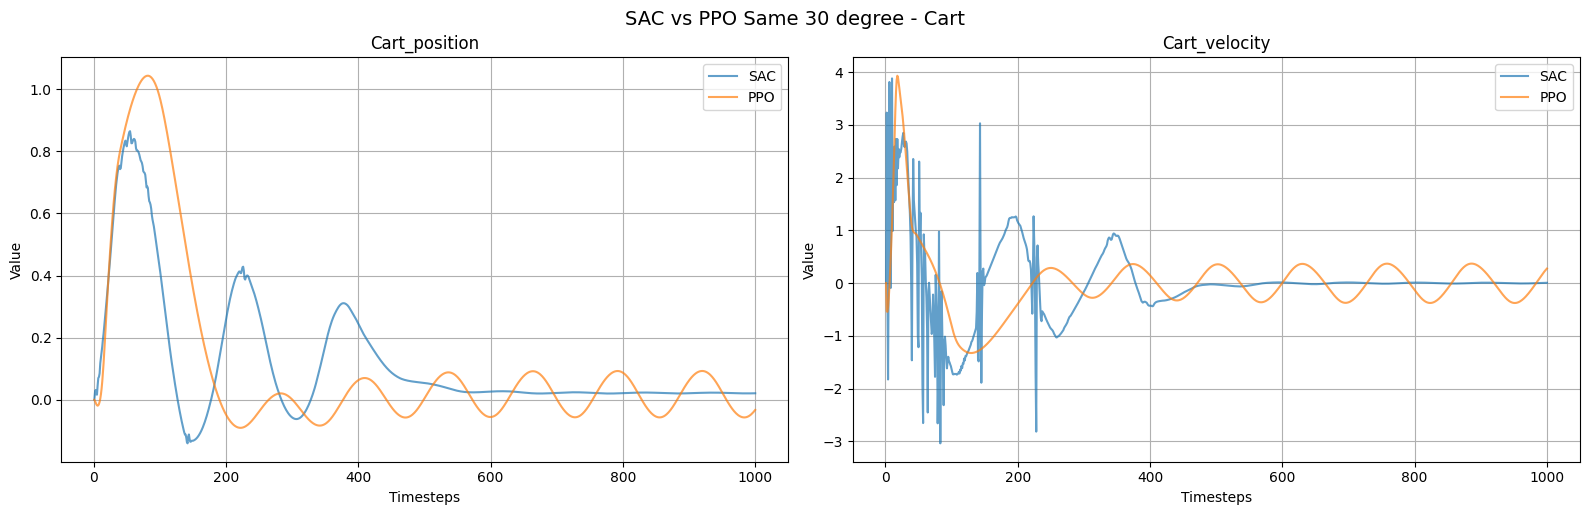

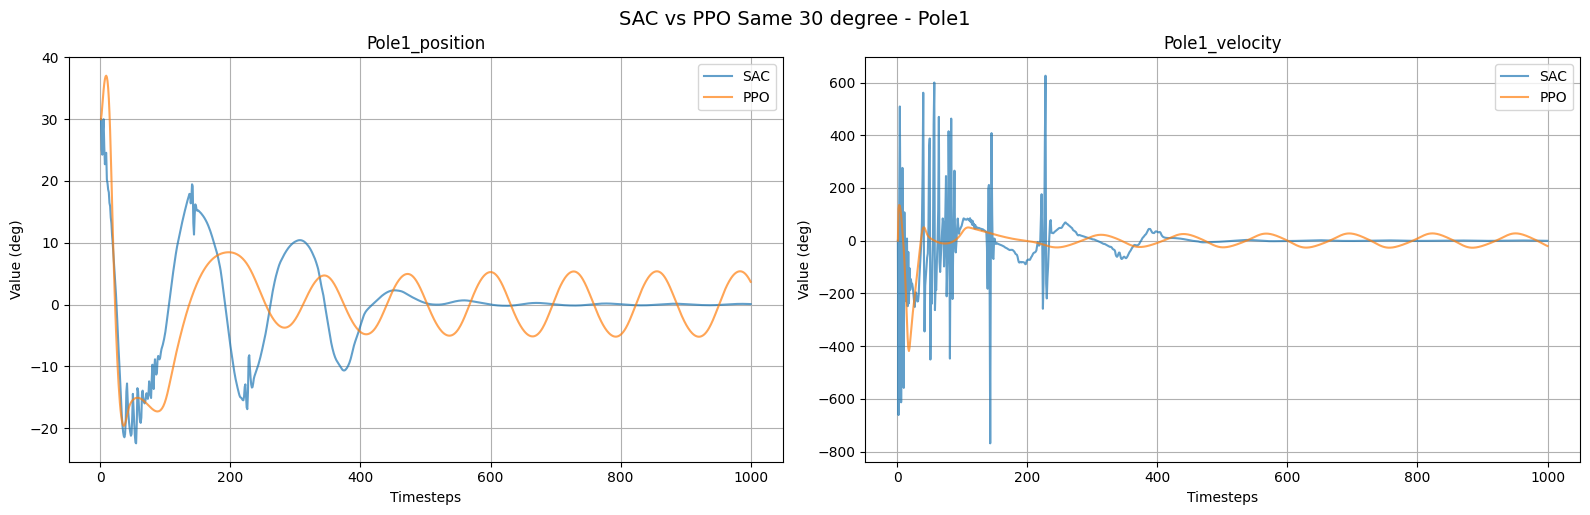

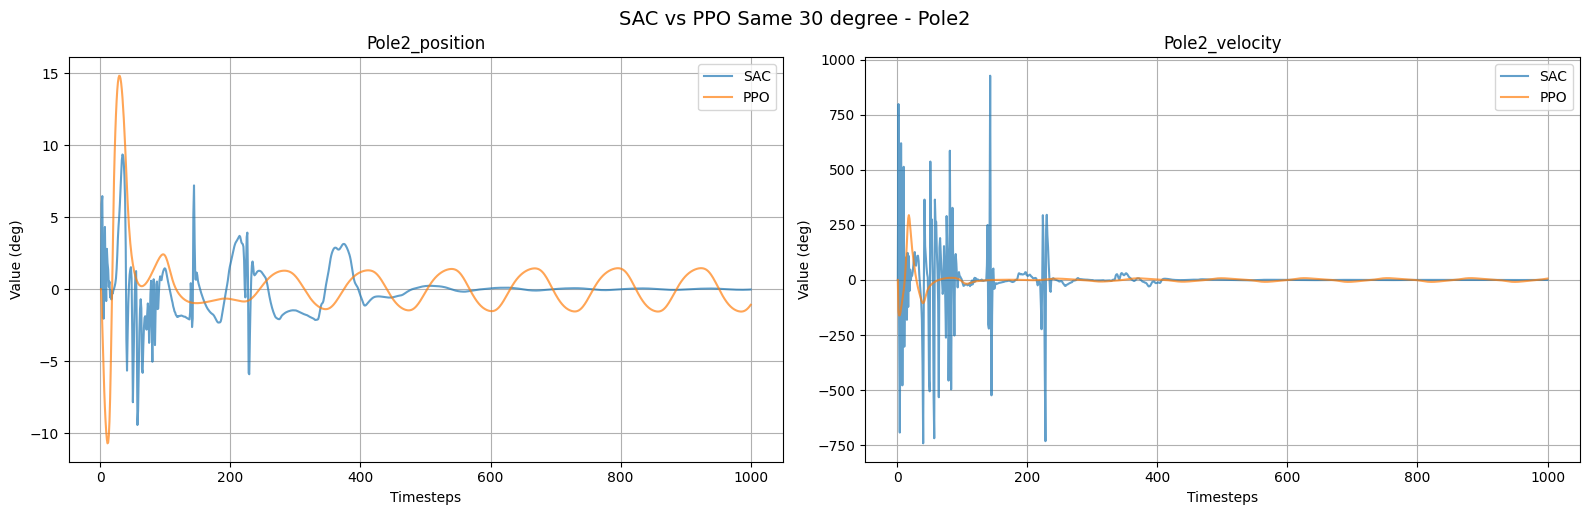

In [9]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same30/SB3_SAC_Same30","obs/SB3_PPO_Same30/SB3_PPO_Same30"]
plot_name = "SAC vs PPO Same 30 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same40/SB3_SAC_Same40, Total Reward: 9.14755916595459
File: obs/SB3_PPO_Same40/SB3_PPO_Same40, Total Reward: -1.1951254606246948


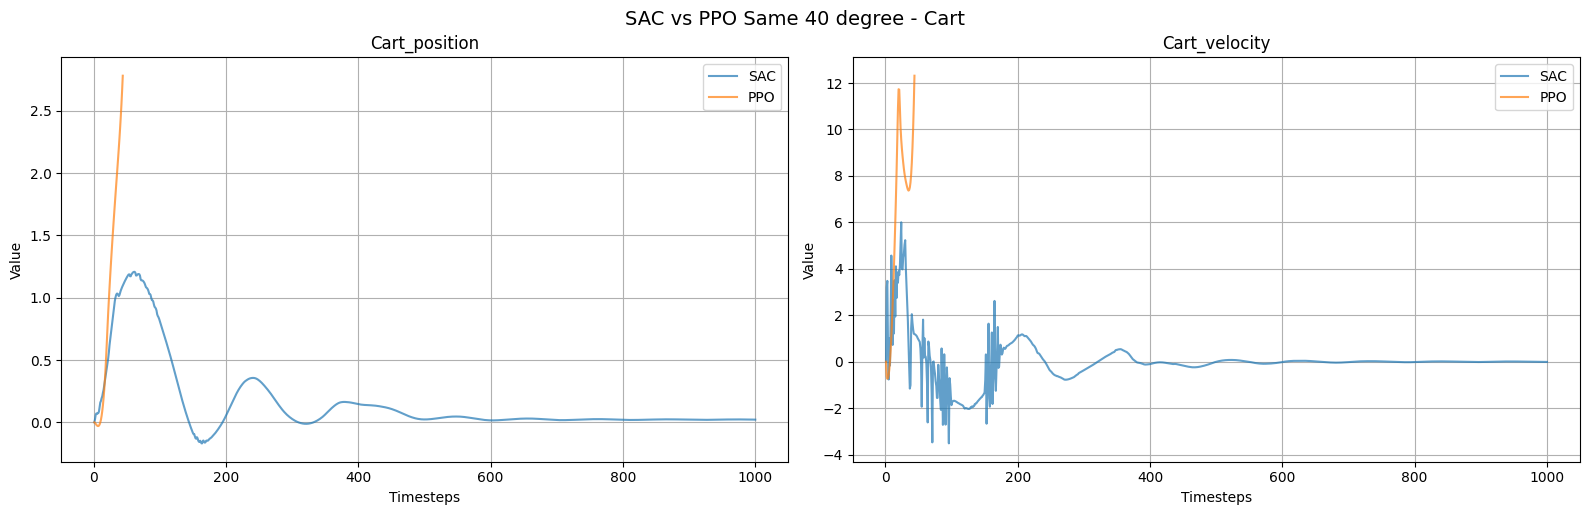

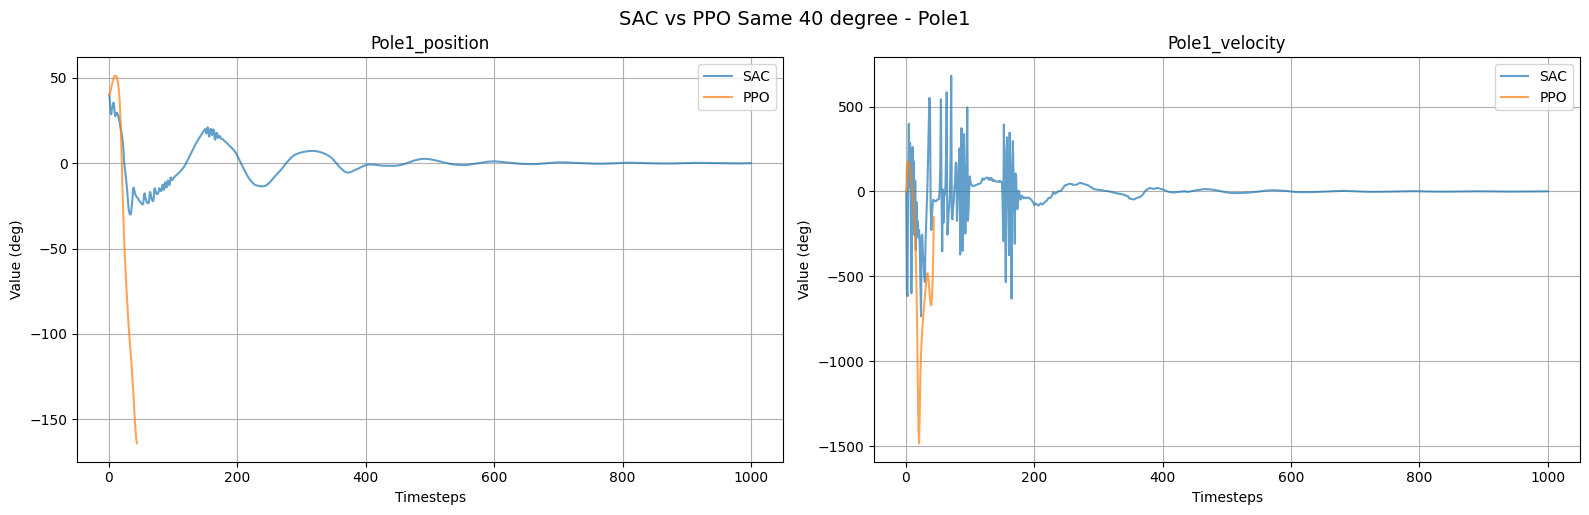

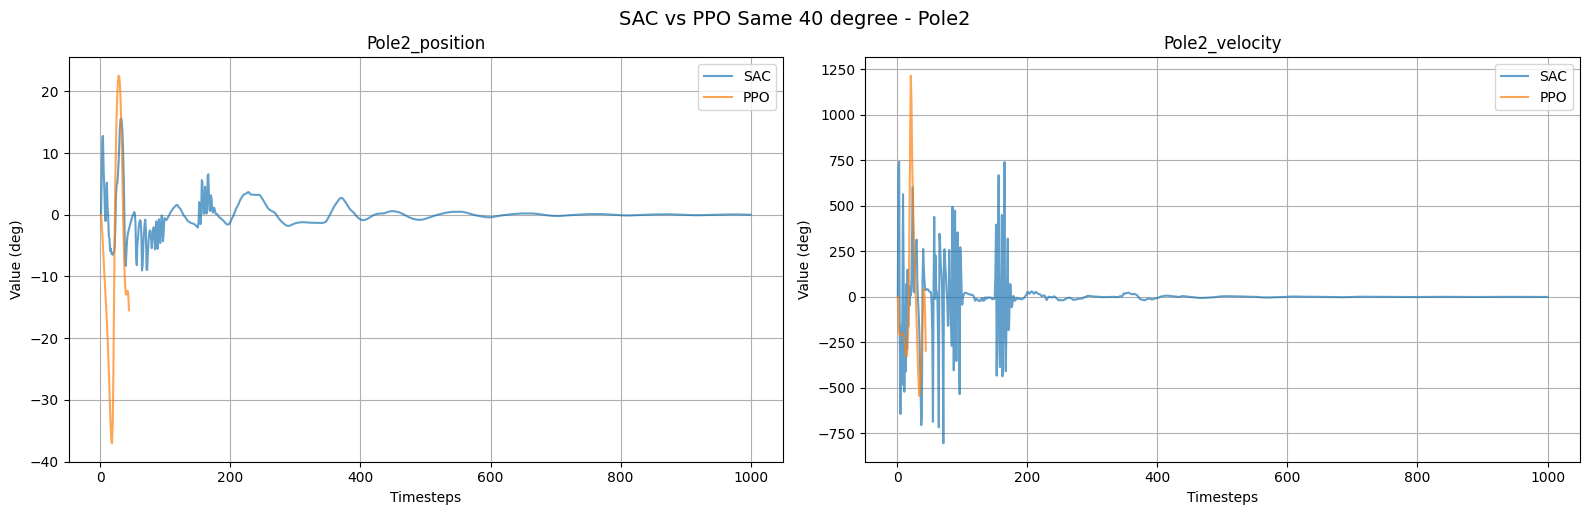

In [10]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same40/SB3_SAC_Same40","obs/SB3_PPO_Same40/SB3_PPO_Same40"]
plot_name = "SAC vs PPO Same 40 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

#### Deflect Direction of DIPC (Opposite)

File: obs/SB3_SAC_Opposit5/SB3_SAC_Opposit5, Total Reward: 9.968977928161621
File: obs/SB3_PPO_Opposit5/SB3_PPO_Opposit5, Total Reward: 9.861199378967285


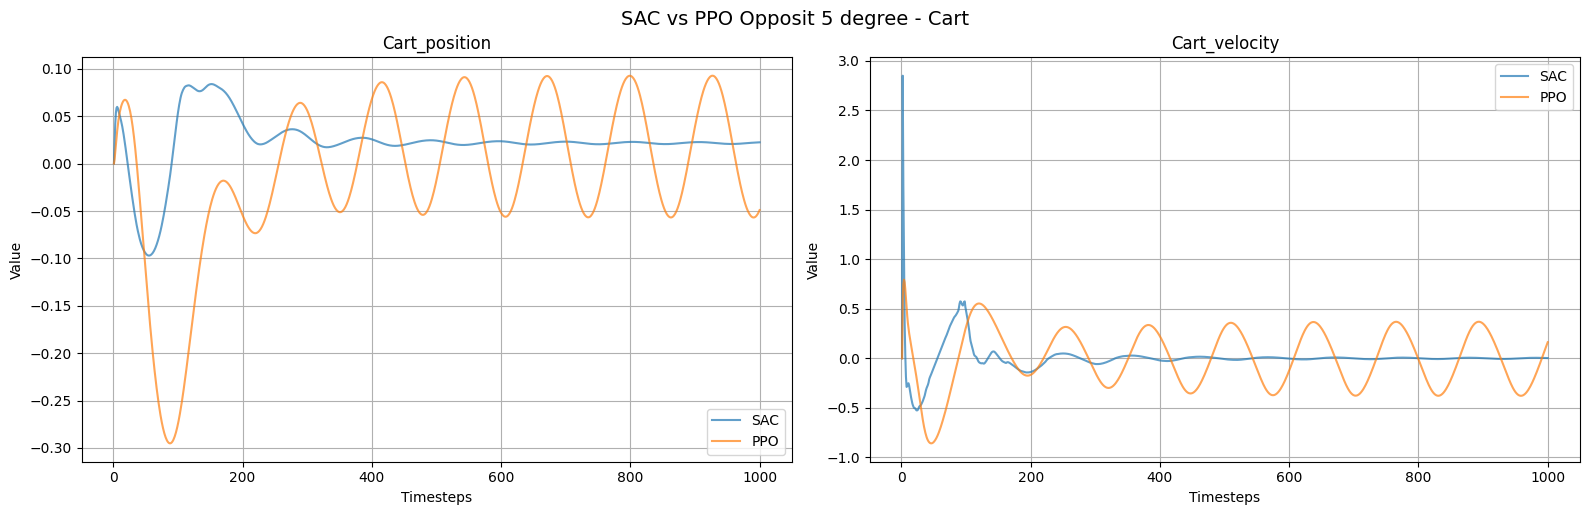

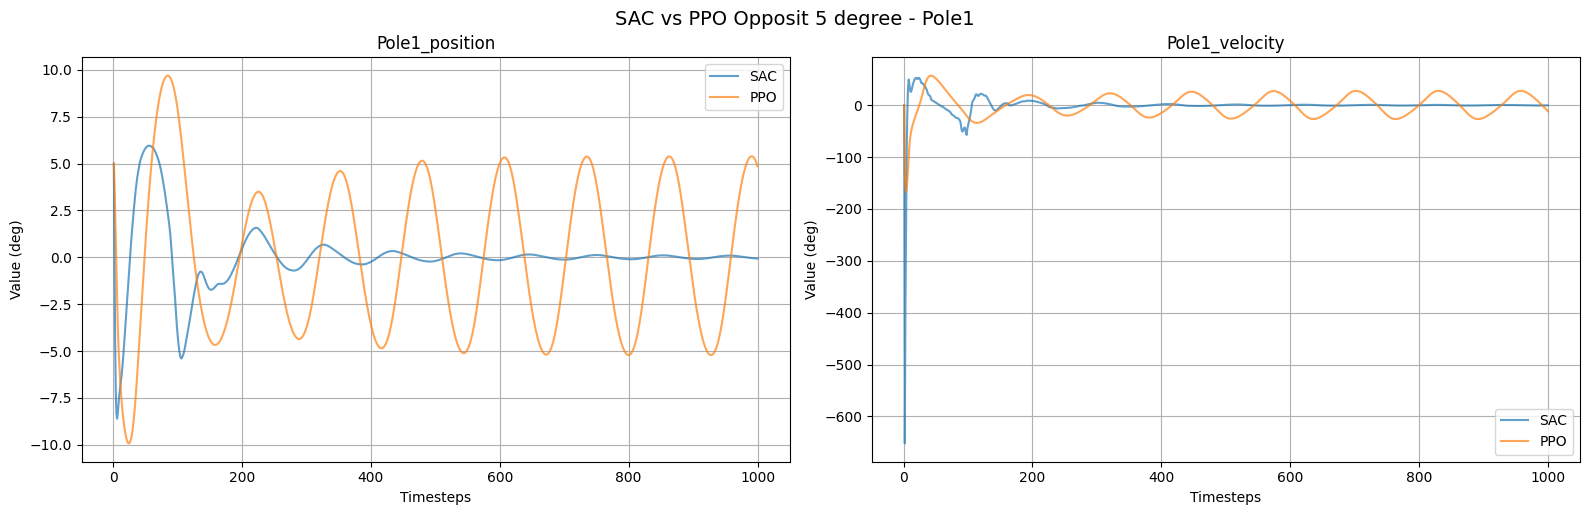

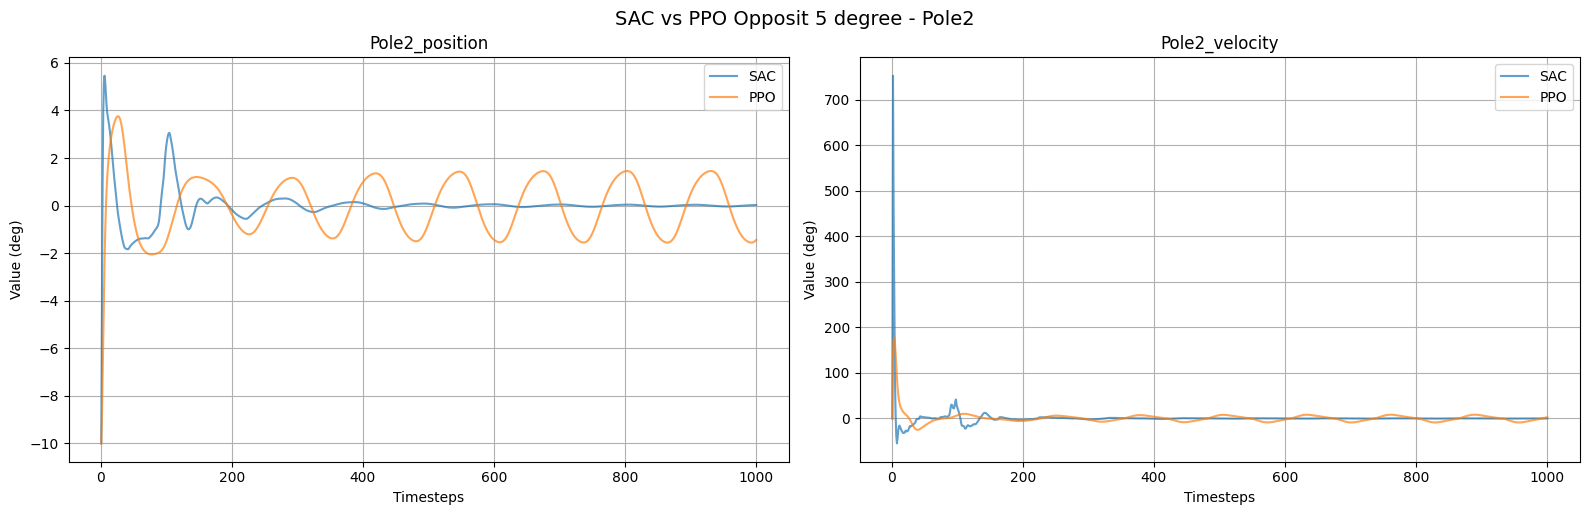

In [11]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit5/SB3_SAC_Opposit5","obs/SB3_PPO_Opposit5/SB3_PPO_Opposit5"]
plot_name = "SAC vs PPO Opposit 5 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Opposit10/SB3_SAC_Opposit10, Total Reward: 9.87343692779541
File: obs/SB3Test_Opposit10/SB3Test_Opposit10, Total Reward: 9.718039512634277


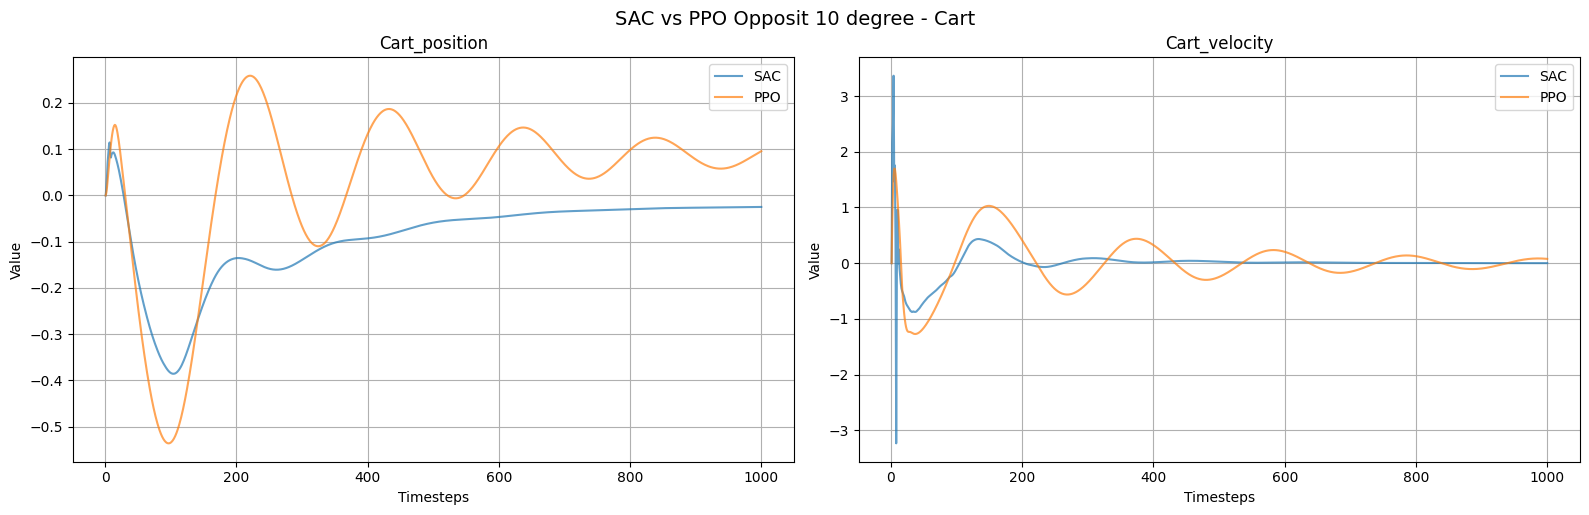

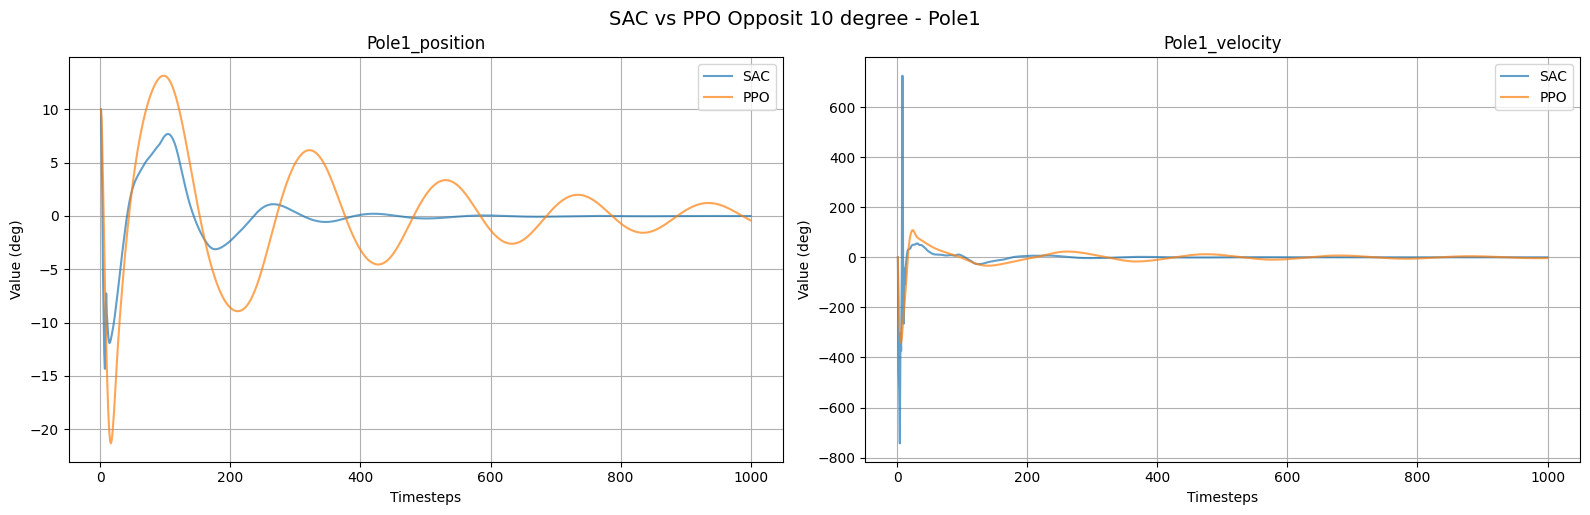

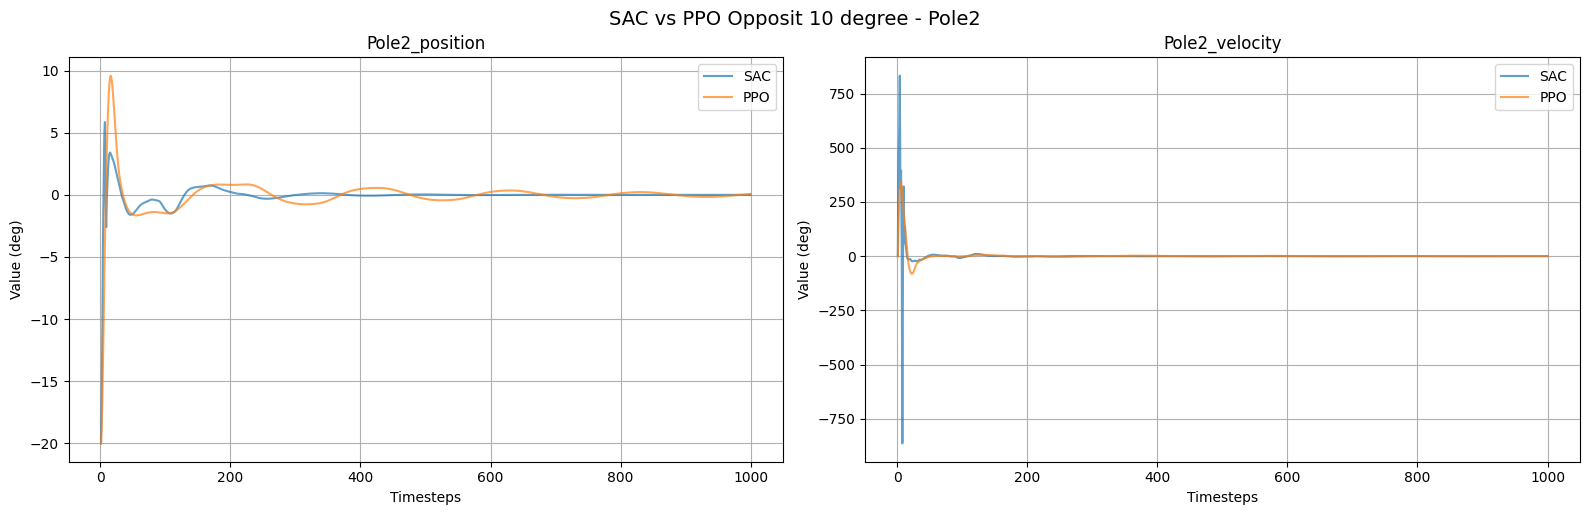

In [12]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit10/SB3_SAC_Opposit10","obs/SB3Test_Opposit10/SB3Test_Opposit10"]
plot_name = "SAC vs PPO Opposit 10 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Opposit15/SB3_SAC_Opposit15, Total Reward: 9.879678726196289
File: obs/SB3_PPO_Opposit15/SB3_PPO_Opposit15, Total Reward: 9.67954158782959


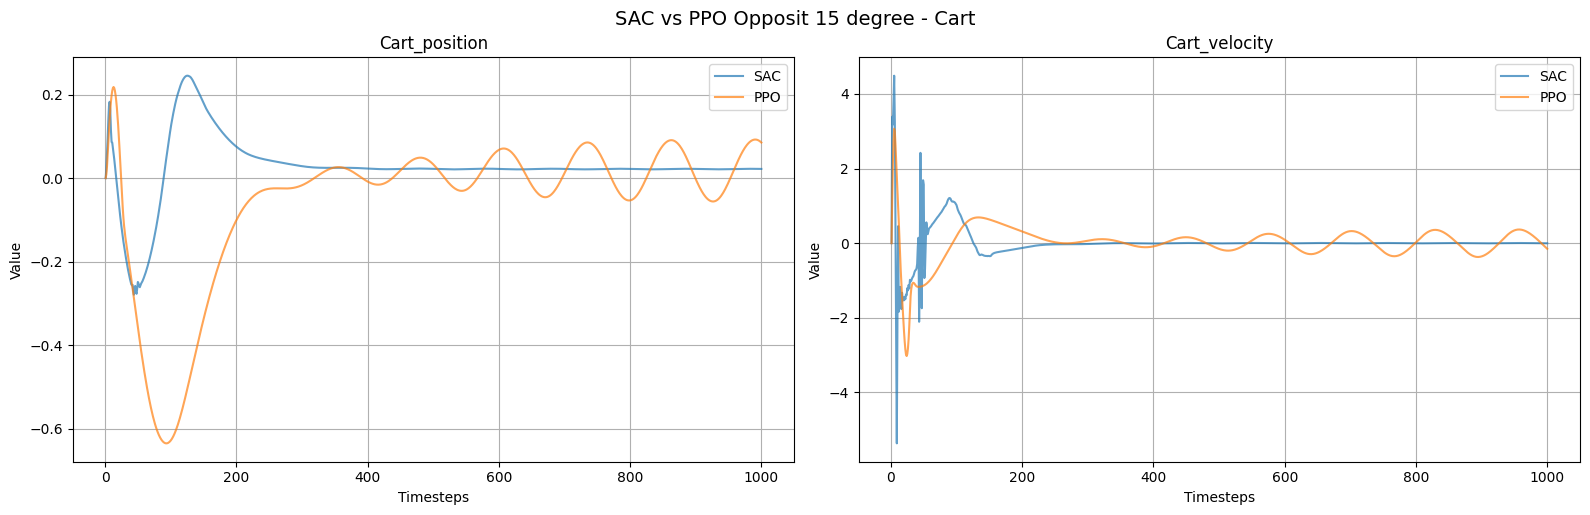

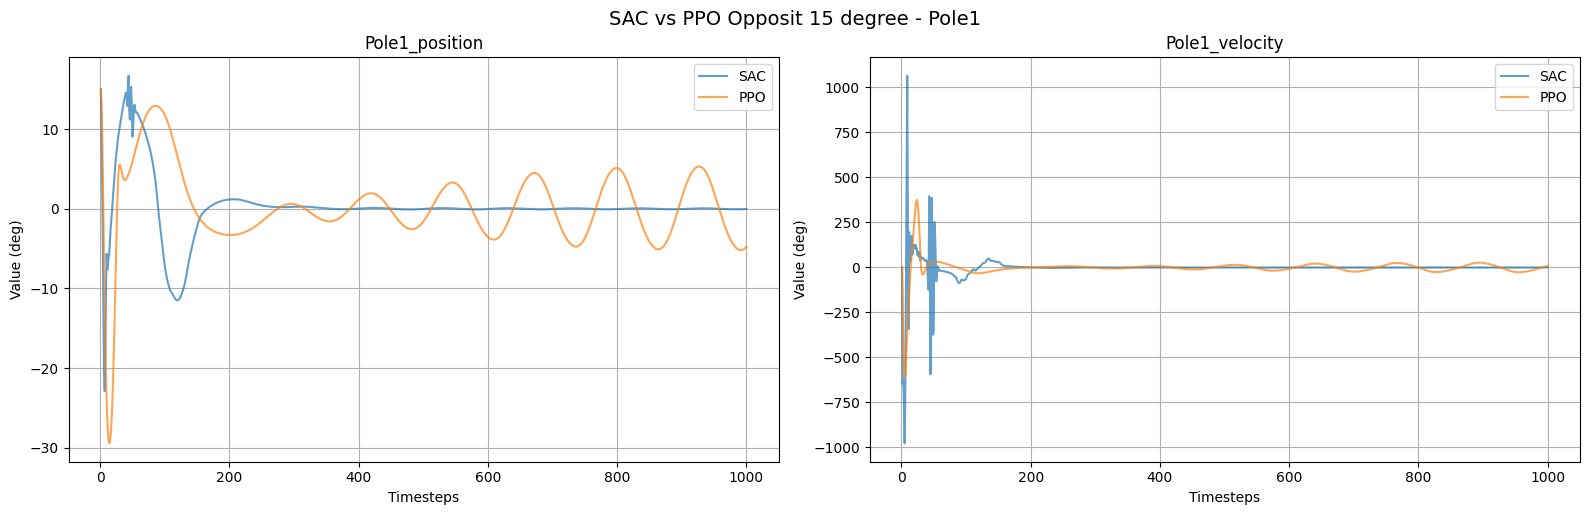

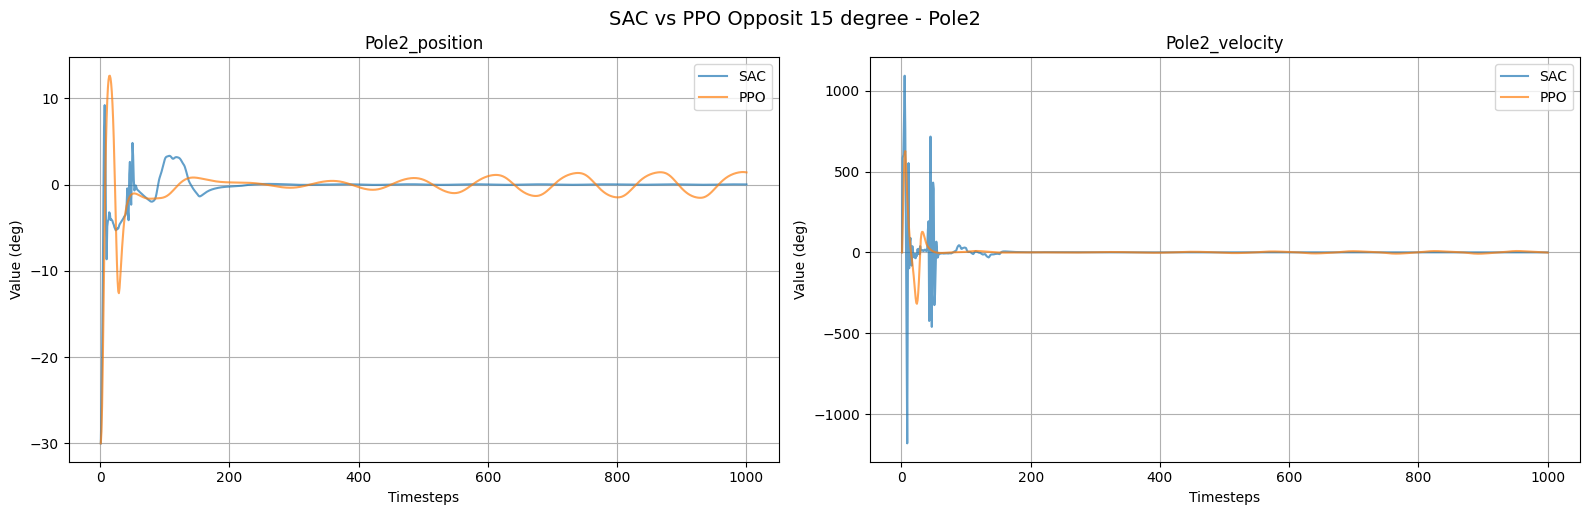

In [13]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit15/SB3_SAC_Opposit15","obs/SB3_PPO_Opposit15/SB3_PPO_Opposit15"]
plot_name = "SAC vs PPO Opposit 15 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

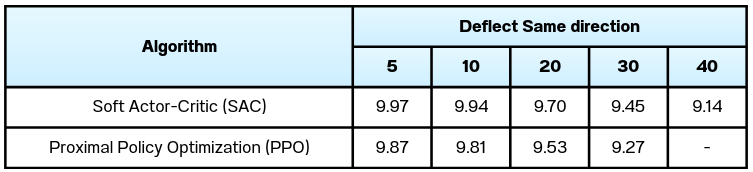
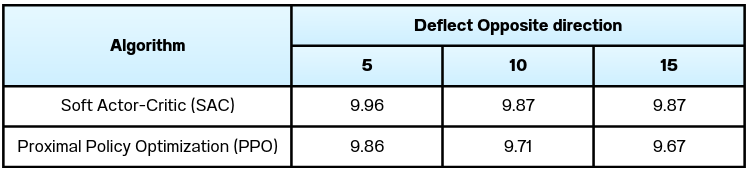

จากการทดสอบการควบคุม Stabilize จากการปล่อย Double inverted pendulum ในตำแหน่งต่างๆ พบว่า Algorithm SAC นั้นมีประสิธิภาพในการควบคุมที่สูงกว่า PPO อย่างเห็นได้ชัดไม่ว่าจะเป็นในด้านของ Reward หรือ stability ก็ตามโดยมีประสิทธิภาพที่ใกล้เคียงกับการใช้ระบบควบคุมแบบมี model (model-base) เช่น MPC แต่ยังคงมีการควบคุมที่ค่อนข้างรุนแรงอยู่บ้าง(สังเกตุได้จากความเร็วของทั้งสามส่วน) ทำให้ในการนำไปใช้งานจริงอาจจะต้องมีการกำหนดข้อบังคับเพิ่มเติม

#### Regions of pendulum recovery (degree)

File: obs/SB3_BestRRSAC_Same/SB3_BestRRSAC_Same, Total Reward: 8.923684120178223


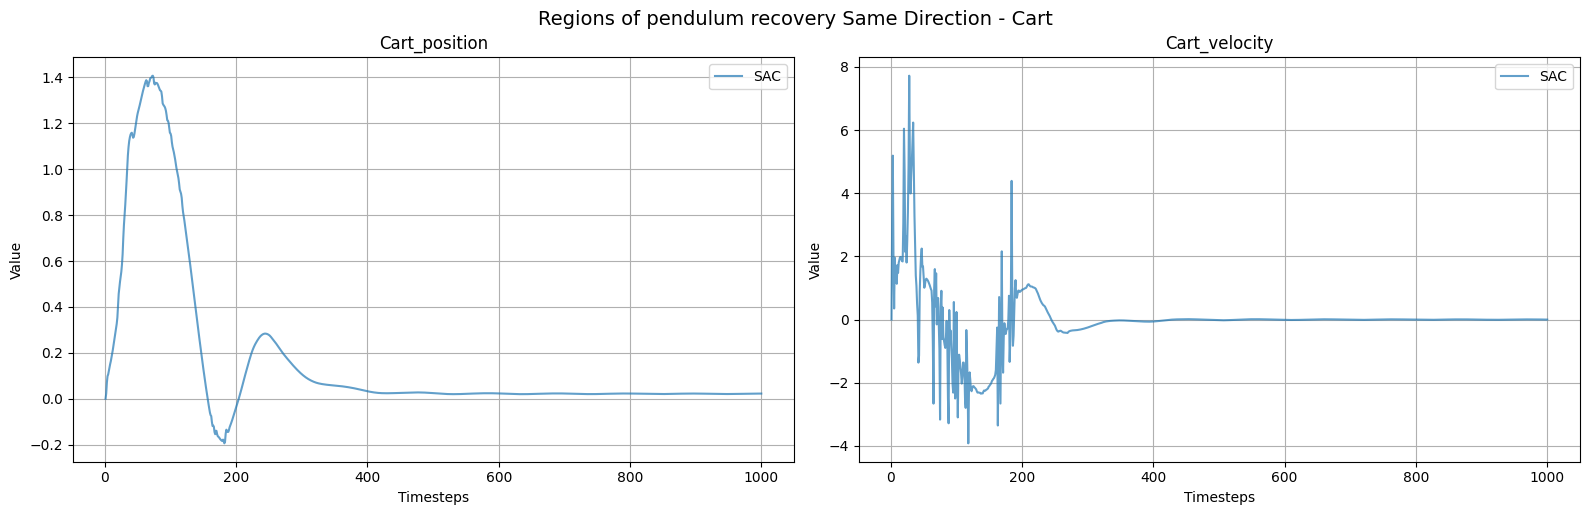

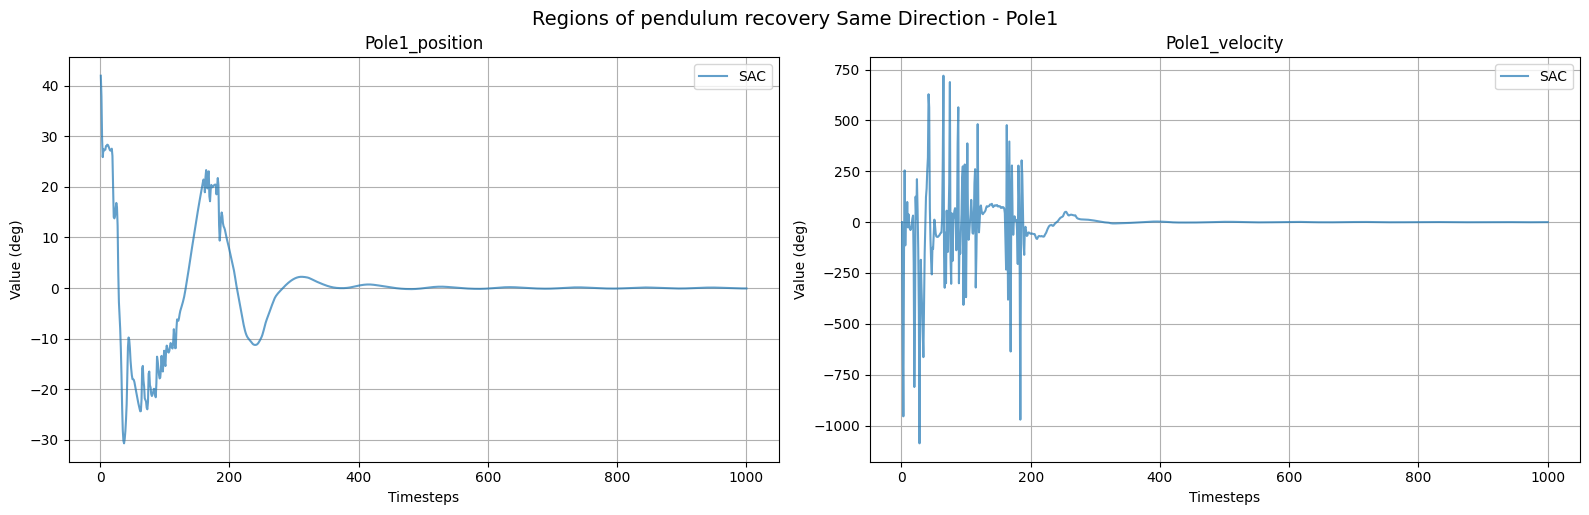

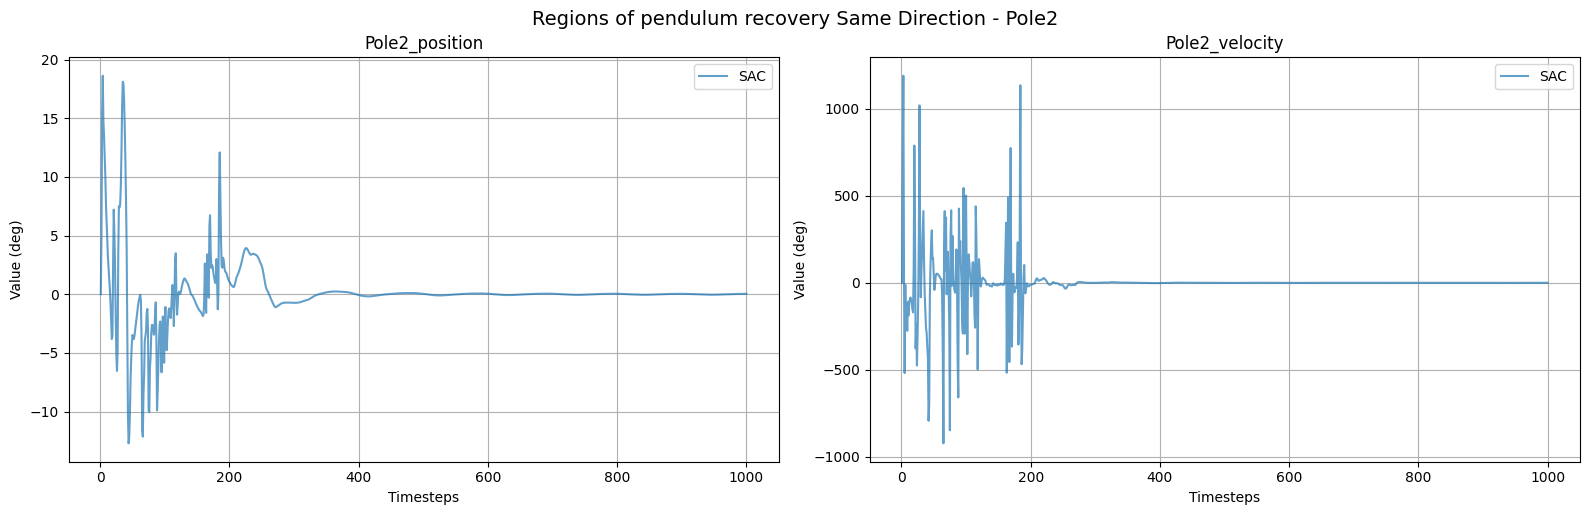

In [14]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRSAC_Same/SB3_BestRRSAC_Same"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["SAC"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRSAC_Opposit/SB3_BestRRSAC_Opposit, Total Reward: 8.828751564025879


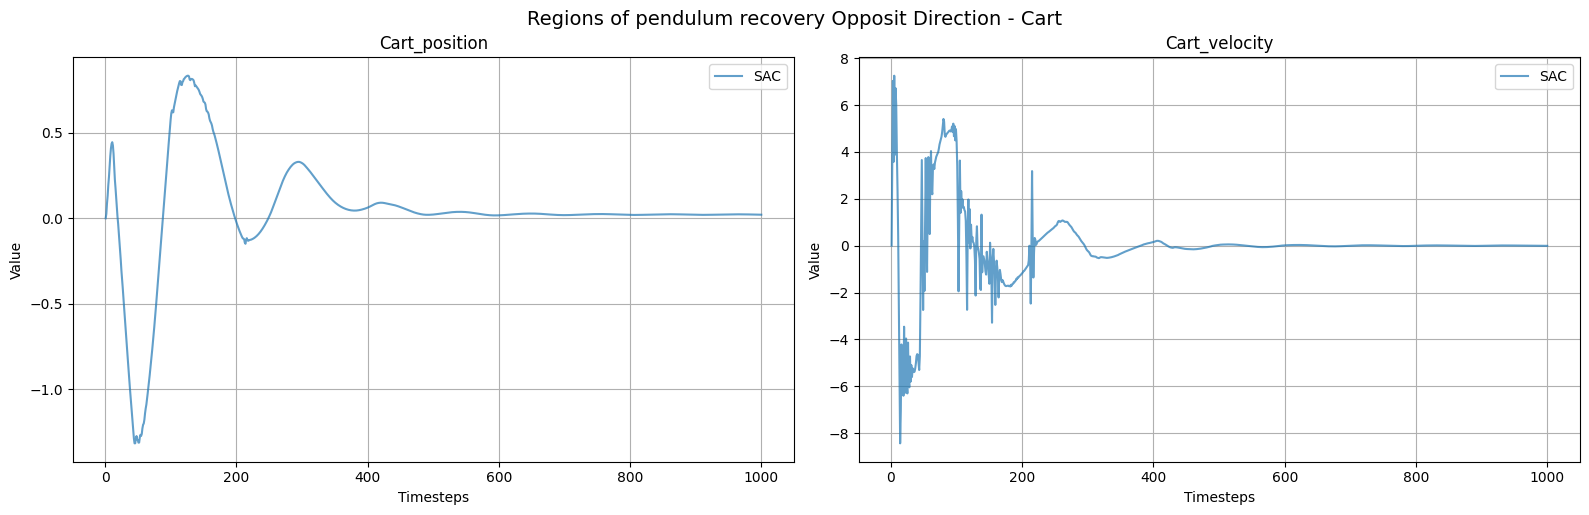

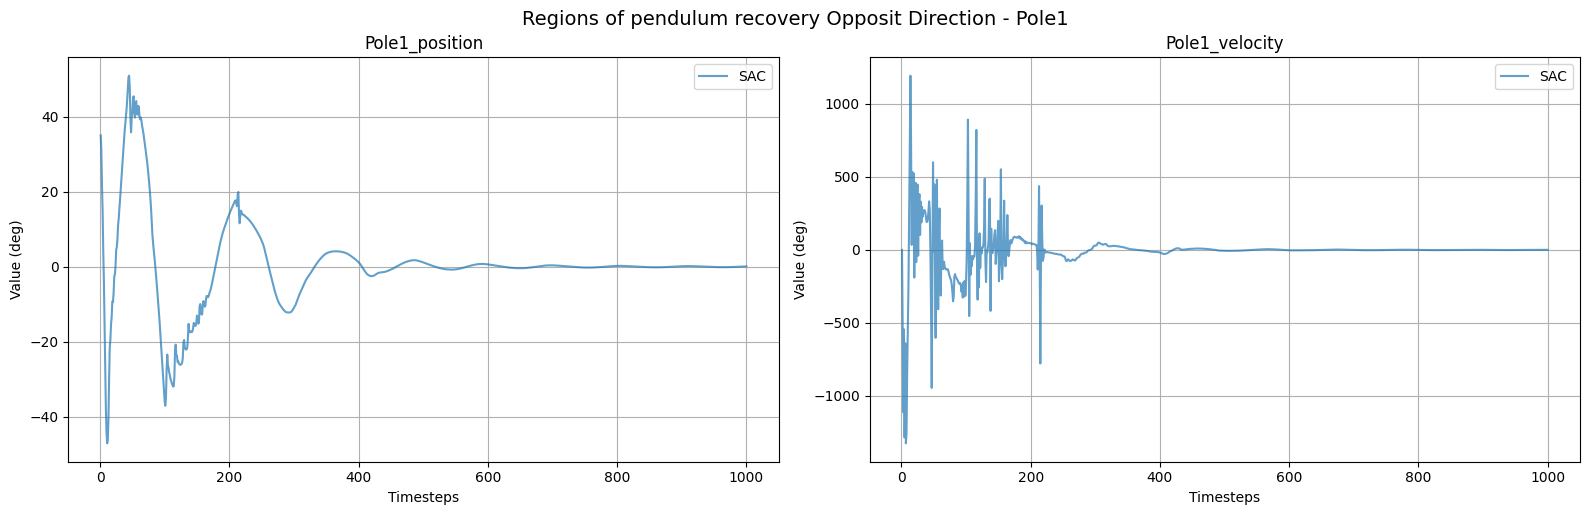

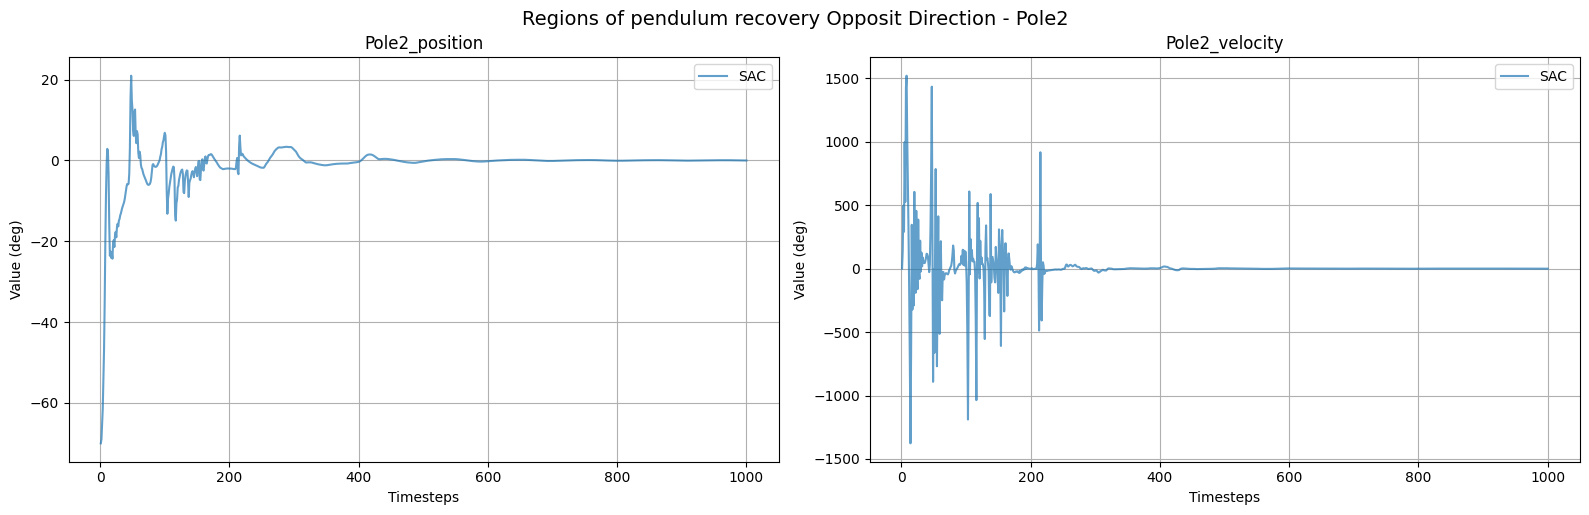

In [15]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRSAC_Opposit/SB3_BestRRSAC_Opposit"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["SAC"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRPPO_Same/SB3_BestRRPPO_Same, Total Reward: 9.20157241821289


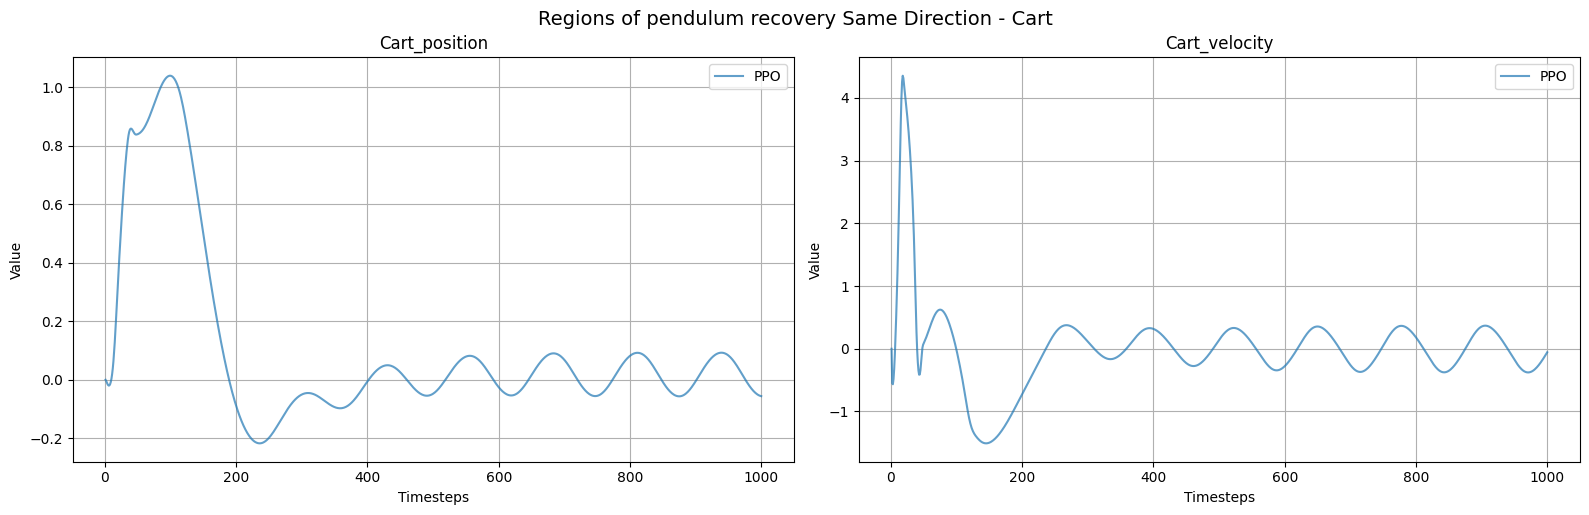

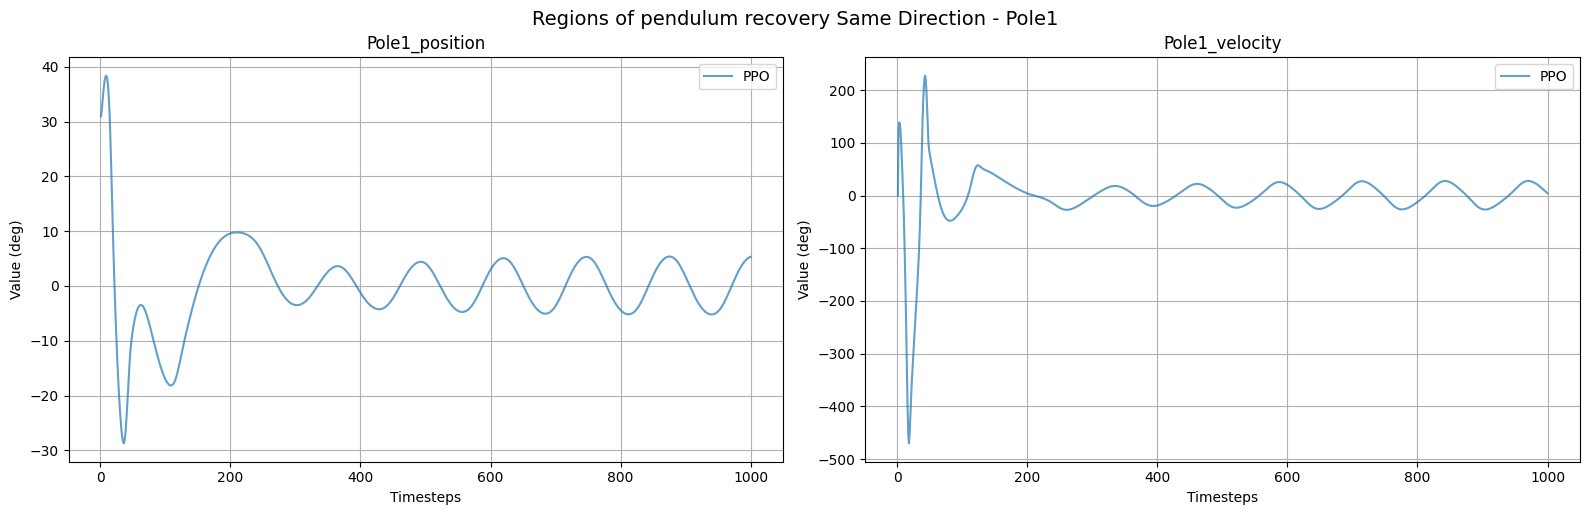

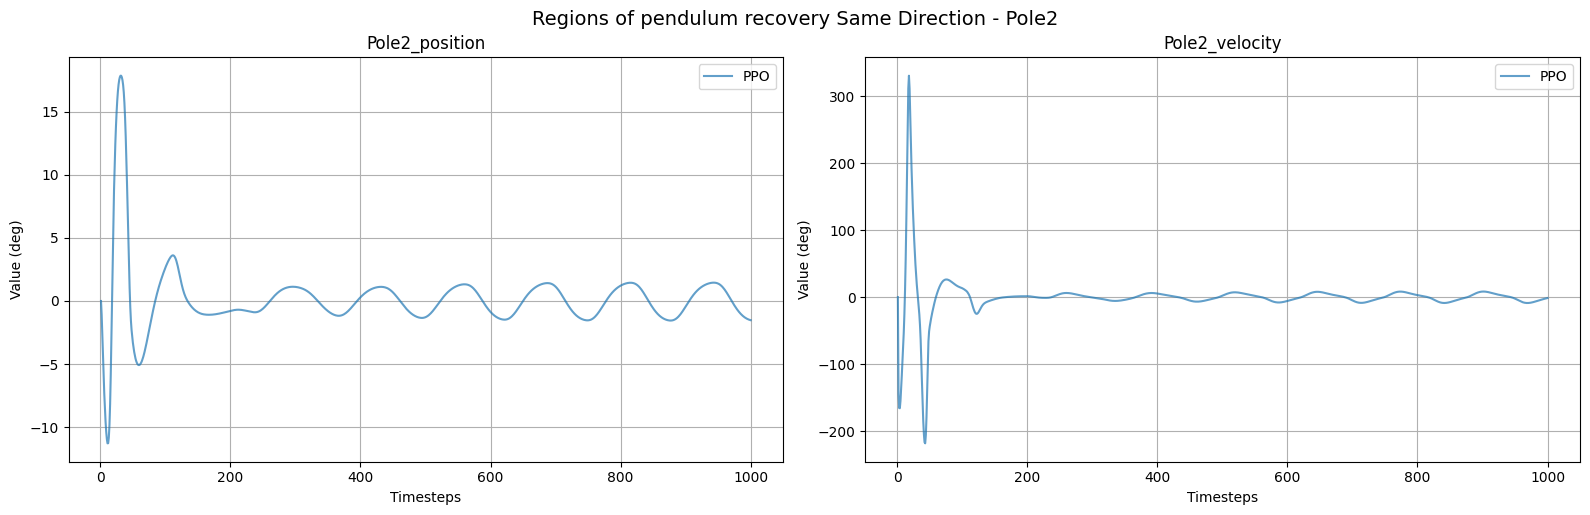

In [16]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRPPO_Same/SB3_BestRRPPO_Same"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRPPO_Opposit/SB3_BestRRPPO_Opposit, Total Reward: 8.740642547607422


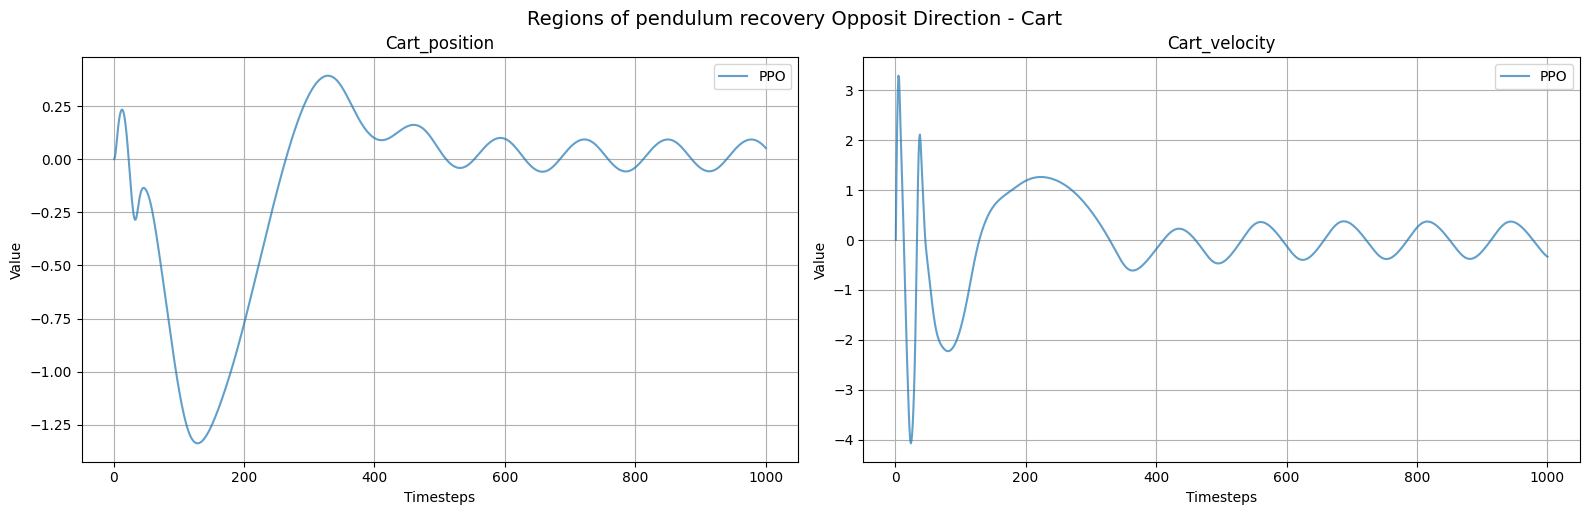

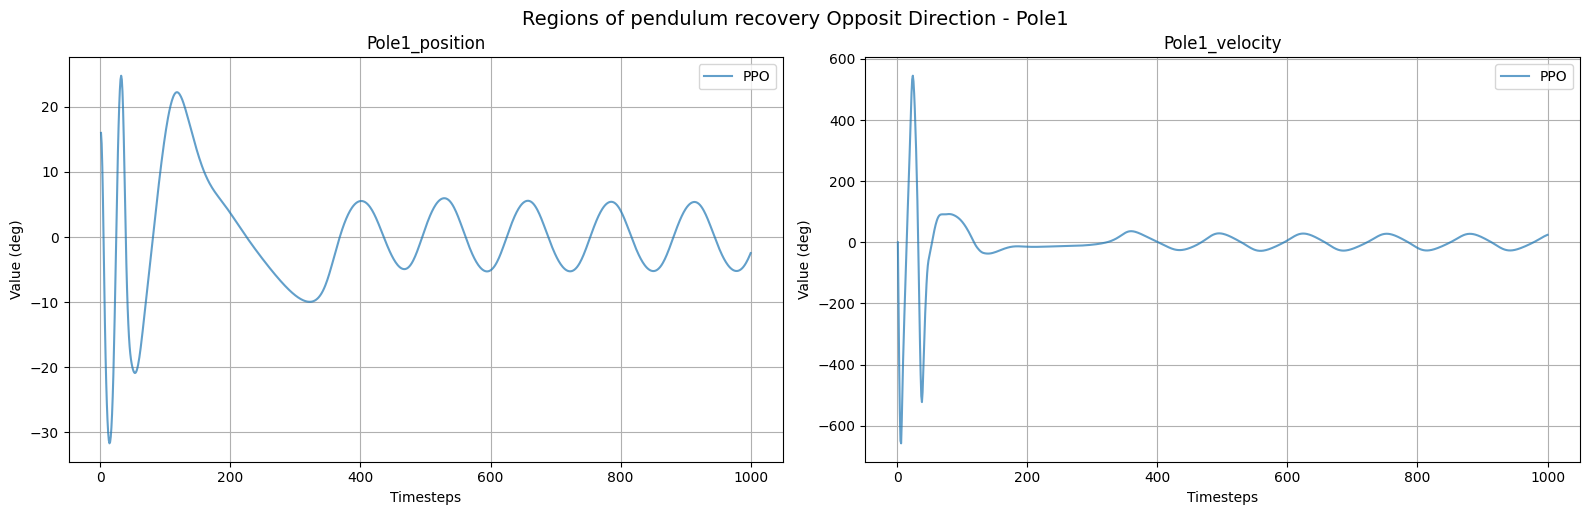

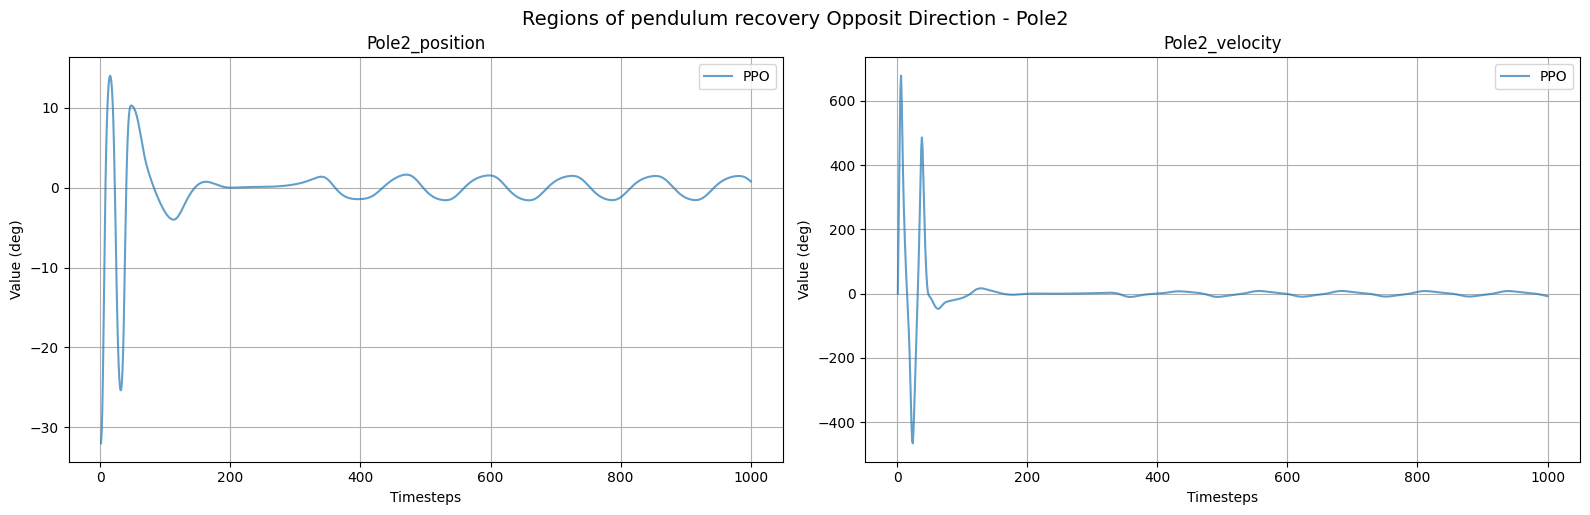

In [17]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRPPO_Opposit/SB3_BestRRPPO_Opposit"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

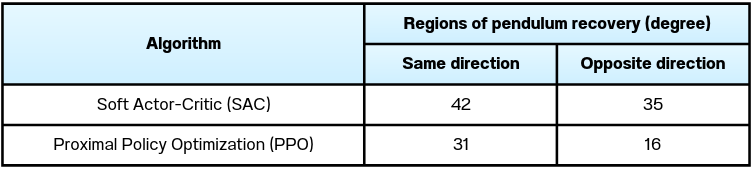

จากการทดสอบประสิทธิภาพในการรักษาสมดุลของ Double inverted pendulum พบว่า Algorithm SAC นั้นสามารถรักษาสมดุลได้ดีกว่า PPO อย่างชัดเจนทั้งในกรณีที่ เบียงเบนทางเดียวกันและทิศทางตรงกันข้ามกัน

## Part 4: Conclusion

| **หัวข้อ**                       | **Soft Actor-Critic (SAC)**                              | **Proximal Policy Optimization (PPO)**                    |
|----------------------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| Training type               | เหมาะกับแบบเดี่ยวหรือขนานเล็กน้อย                      | เหมาะกับการฝึกแบบขนาน                                     |
| Wall clock time training  | ใช้เวลามากกว่า PPO                                       | เร็ว                                                        |
| Reward Scaling              | ไม่ค่อยมีผล                                              | มีผลดี                                                      |
| Stability to control          | ระดับ state-of-the-art (แต่บางครั้งออก action แรงเกินไป) | ผลงานดีแต่ไม่ถึงระดับ SOTA                                 |
| Regions of pendulum recovery     | ทำได้ดีเท่าการควบคุมแบบใช้โมเดล (MPC)                    | อยู่ในระดับปานกลาง                                          |


### Which one perform good at control task?

SAC แสดงประสิทธิภาพที่ดีกว่า PPO ในงานควบคุม ทั้งใน Simulation และ RealWorld เนื่องจาก SAC มีการ Explore จากการ maximize entropy ทำให้สามารถที่จะหา Actions ที่ดีที่สุดในการทำให้ Return นั้นมีค่าสูงที่สุดอีกทั้งยังช่วยในการหลีกเลี่ยงการเกิด premature convergence (การลู่เข้าสู่ Policy ที่ไม่เหมาะสมก่อนเวลาอันควร)ได้ อย่างไรก็ตาม การนำ SAC ไปใช้ในโลกจริงจำเป็นต้องมี Constrain ในการเลือก actions เนื่องจาก SAC มักจะสำรวจแบบเชิงรุกมากเกินไป ซึ่งอาจเป็นอันตรายหรือไม่เหมาะสมสำหรับระบบทางกายภาพ

### Which one perform good at training and convergent time?

Simulation
- สามารถที่จะทำการ Train parallel ส่งผลให้การ train โดยใช้งาน PPO จะสามารถเรียนรู้ได้ไวกว่า SAC

RealWorld
- ไม่สามารถที่จะทำการ Train parallel หรือในการ train parallel นั้นทำได้ยากและอาจมีค่าใช้จ่ายที่สูง ส่งผลให้การ train ด้วย SAC จะเรียนรู้ได้ดีกว่าเพราะเป็น algorithm Off-policy ซี่งสามารถนำประสบการณ์จาก Replay buffer มาใช้ซ้ำได้อย่างมีประสิทธิภาพ